In [505]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from ELM import ELM
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import layers
np.random.seed(42)
print("Aktualnie ustawiony seed:", np.random.get_state()[1][0])



Aktualnie ustawiony seed: 42


In [506]:
data = pd.read_csv('diagnosed_cbc_data_v4.csv')

# 1. Preliminary analysis

In [507]:
data

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.00,43.200,50.100,4.30000,5.00000,2.77,7.3,24.2000,87.7,26.3,30.1,189.0,12.500000,0.17000,Normocytic hypochromic anemia
1,10.00,42.400,52.300,4.20000,5.30000,2.84,7.3,25.0000,88.2,25.7,20.2,180.0,12.500000,0.16000,Normocytic hypochromic anemia
2,7.20,30.700,60.700,2.20000,4.40000,3.97,9.0,30.5000,77.0,22.6,29.5,148.0,14.300000,0.14000,Iron deficiency anemia
3,6.00,30.200,63.500,1.80000,3.80000,4.22,3.8,32.8000,77.9,23.2,29.8,143.0,11.300000,0.12000,Iron deficiency anemia
4,4.20,39.100,53.700,1.60000,2.30000,3.93,0.4,316.0000,80.6,23.9,29.7,236.0,12.800000,0.22000,Normocytic hypochromic anemia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,4.40,25.845,77.511,1.88076,5.14094,4.86,13.5,46.1526,80.7,27.7,34.4,180.0,14.312512,0.26028,Healthy
1277,5.60,25.845,77.511,1.88076,5.14094,4.85,15.0,46.1526,91.7,31.0,33.8,215.0,14.312512,0.26028,Healthy
1278,9.20,25.845,77.511,1.88076,5.14094,4.47,13.1,46.1526,88.7,29.3,33.0,329.0,14.312512,0.26028,Healthy
1279,6.48,25.845,77.511,1.88076,5.14094,4.75,13.2,46.1526,86.7,27.9,32.1,174.0,14.312512,0.26028,Healthy


The table consists of 1281 rows and 16 columns, describing various blood parameters and medical diagnoses. Here is a description of each column:

1. **WBC** - White Blood Cell count.
2. **LYMp** - Lymphocyte percentage.
3. **NEUTp** - Neutrophil percentage.
4. **LYMn** - Lymphocyte count.
5. **NEUTn** - Neutrophil count.
6. **RBC** - Red Blood Cell count.
7. **HGB** - Hemoglobin concentration.
8. **HCT** - Hematocrit.
9. **MCV** - Mean Corpuscular Volume.
10. **MCH** - Mean Corpuscular Hemoglobin.
11. **MCHC** - Mean Corpuscular Hemoglobin Concentration.
12. **PLT** - Platelet count.
13. **PDW** - Platelet Distribution Width.
14. **PCT** - Plateletcrit.
15. **Diagnosis** - Medical diagnosis.

The Diagnosis column contains values:

1. **Healthy** - Indicates that the individual's blood test results are within normal ranges, showing no signs of anemia, infection, or other hematological disorders.

2. **Normocytic hypochromic anemia** - Anemia characterized by red blood cells (RBCs) that are of normal size (normocytic) but have less hemoglobin than normal (hypochromic). This can occur in conditions such as chronic disease anemia or early iron deficiency anemia.

3. **Normocytic normochromic anemia** - Anemia where the RBCs are normal in size and hemoglobin content but reduced in number. This type is often seen in chronic diseases, acute blood loss, or bone marrow disorders.

4. **Iron deficiency anemia** - Anemia caused by a lack of iron, which is necessary for the production of hemoglobin. This results in microcytic (small) and hypochromic (pale) RBCs. Common causes include blood loss, poor diet, or malabsorption.

5. **Thrombocytopenia** - A condition characterized by a low platelet count, which can lead to increased bleeding and bruising. Causes include bone marrow disorders, autoimmune diseases, and certain medications.

6. **Other microcytic anemia** - Anemia with RBCs that are smaller than normal (microcytic), not specifically classified under iron deficiency. It can be caused by conditions like thalassemia or chronic disease.

7. **Leukemia** - A type of cancer that affects blood and bone marrow, leading to an overproduction of abnormal white blood cells. Symptoms can include fatigue, frequent infections, and easy bruising.

8. **Macrocytic anemia** - Anemia where the RBCs are larger than normal (macrocytic). It is often caused by deficiencies in vitamin B12 or folate, and it can also be due to alcoholism, liver disease, or certain medications.

9. **Leukemia with thrombocytopenia** - A condition where an individual has both leukemia and a low platelet count. This combination can exacerbate the symptoms of both conditions, such as increased bleeding risk and fatigue.

In [508]:
data['Diagnosis'].value_counts()

Diagnosis
Healthy                           336
Normocytic hypochromic anemia     279
Normocytic normochromic anemia    269
Iron deficiency anemia            189
Thrombocytopenia                   73
Other microcytic anemia            59
Leukemia                           47
Macrocytic anemia                  18
Leukemia with thrombocytopenia     11
Name: count, dtype: int64

The obvious problem of this data can be, that some of the types of anemia has a very little amount of occurence. Let's try to look on some visualisations, which can give us some informations.

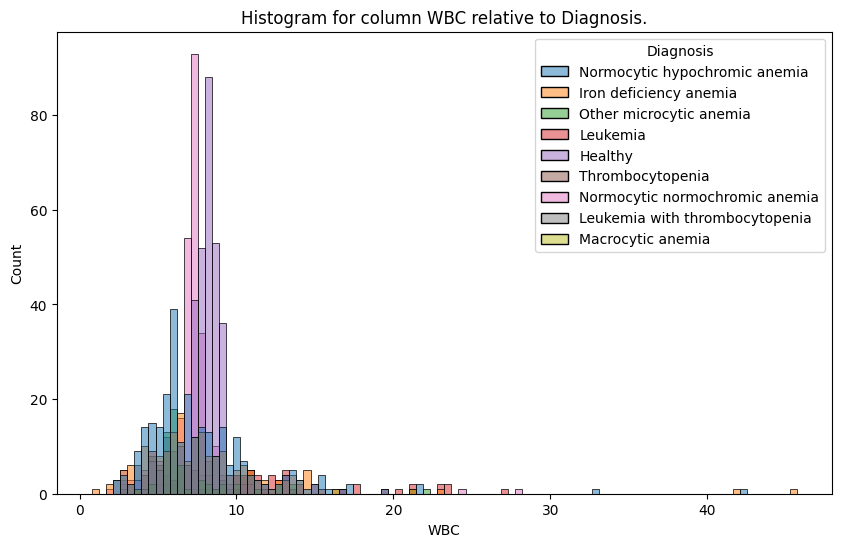

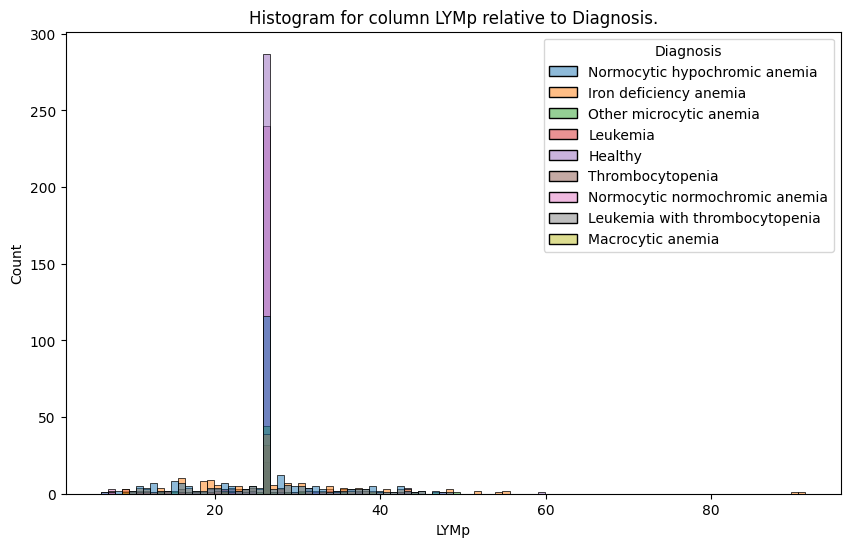

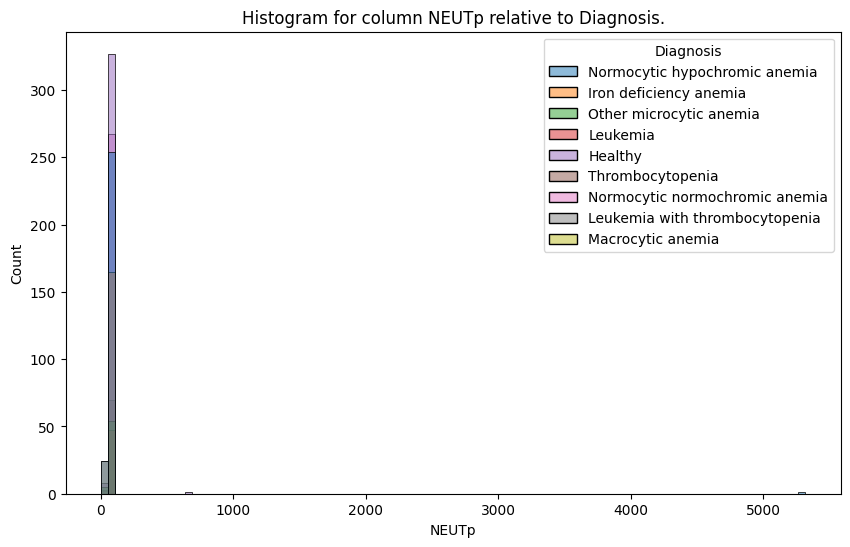

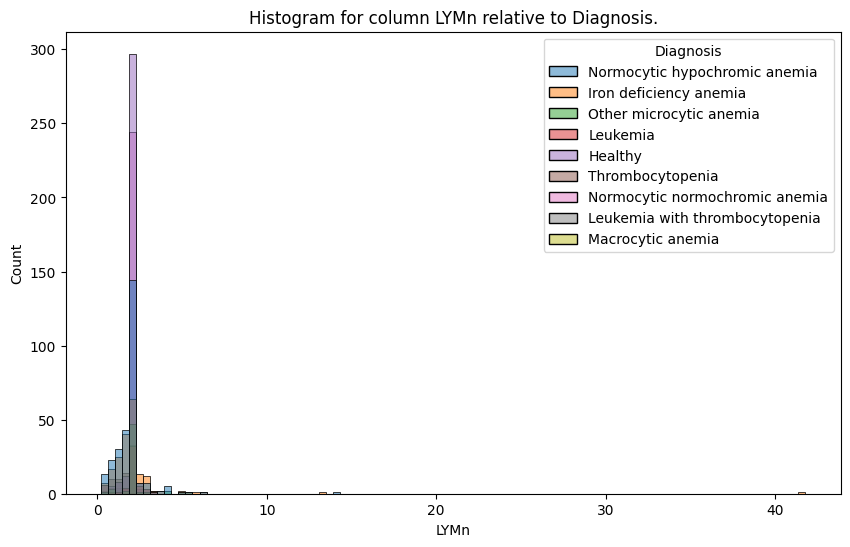

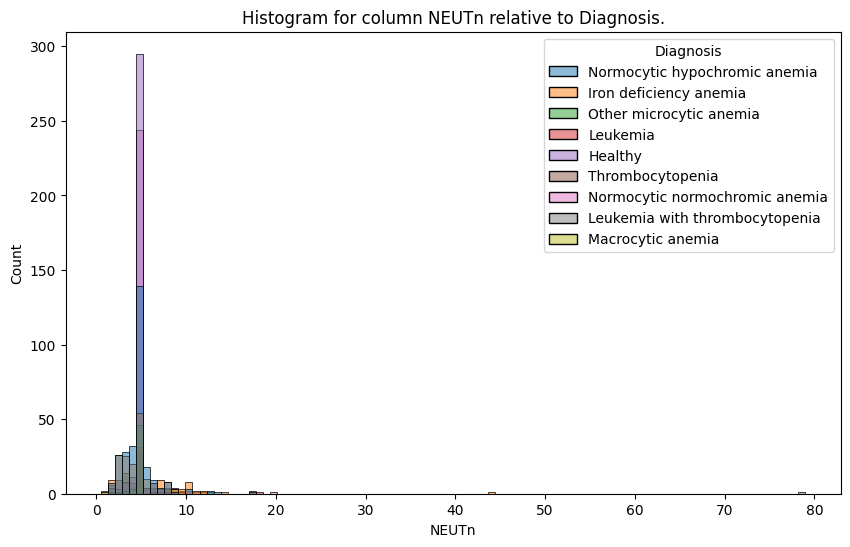

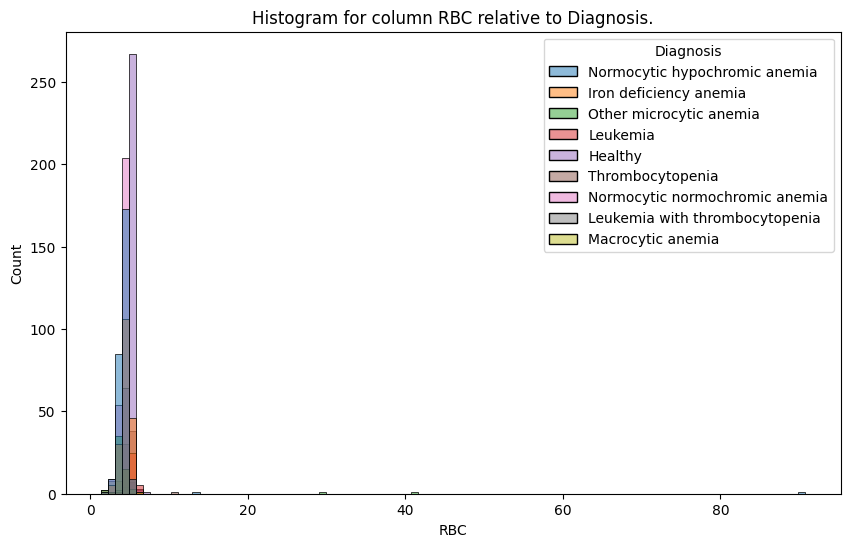

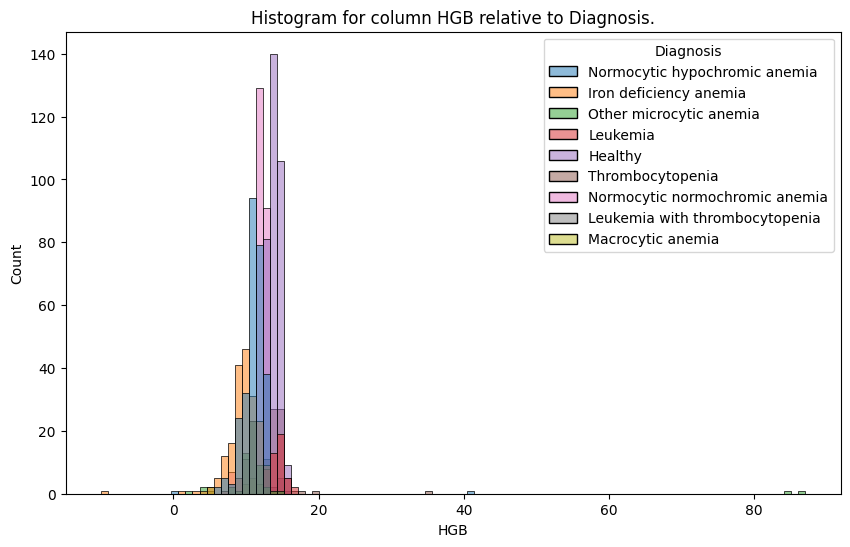

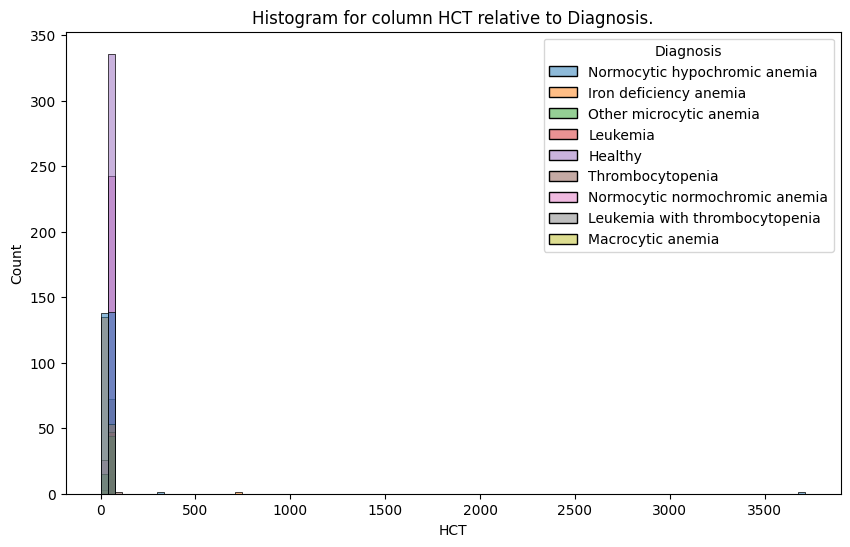

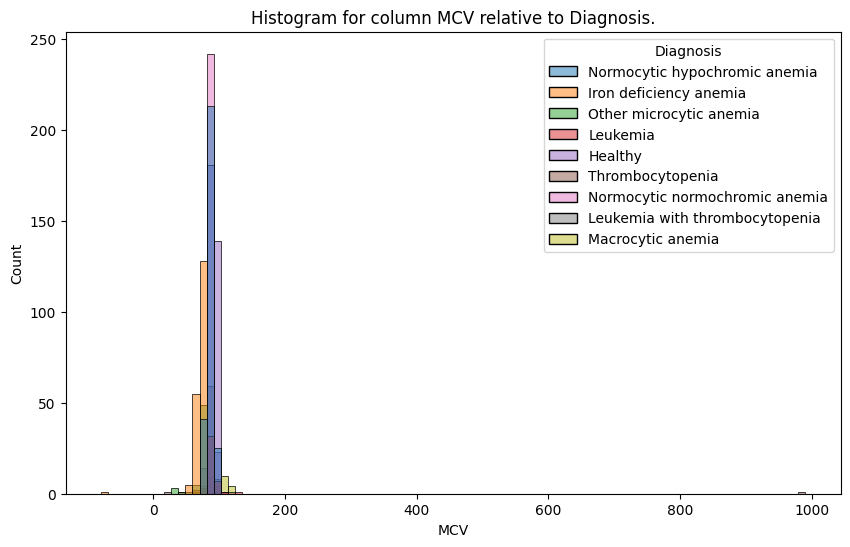

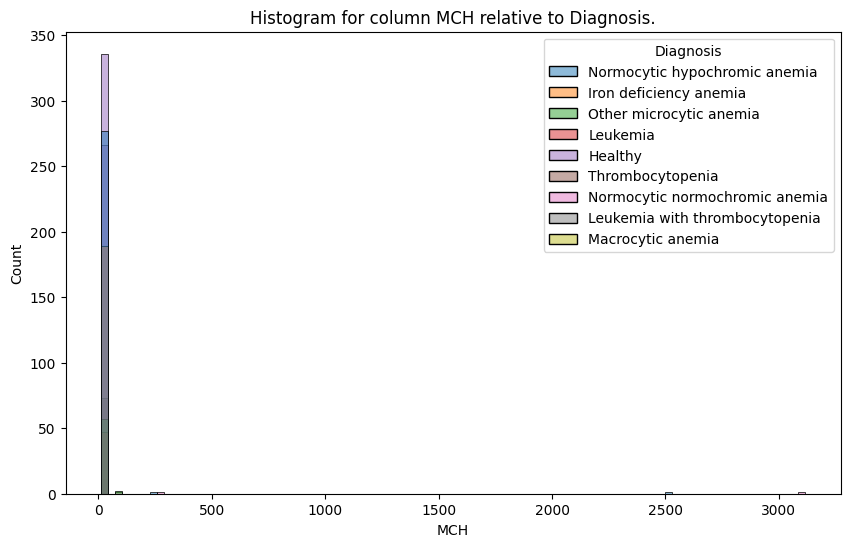

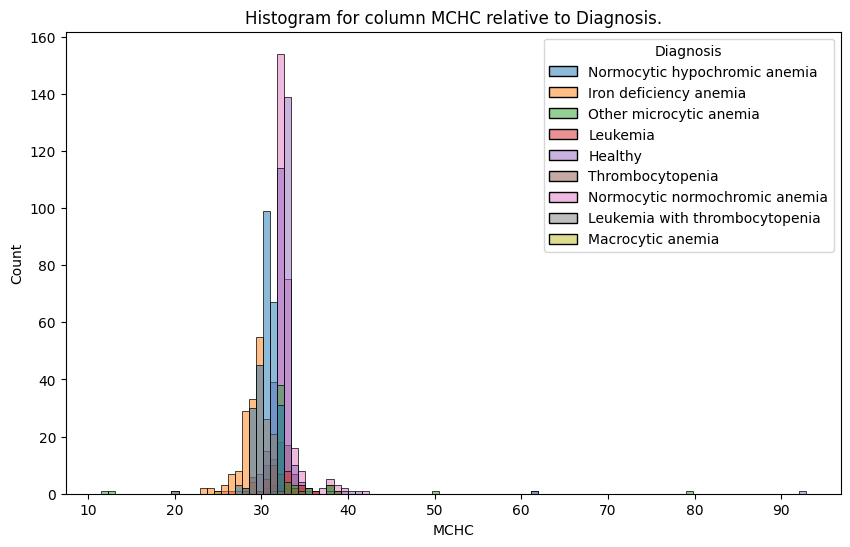

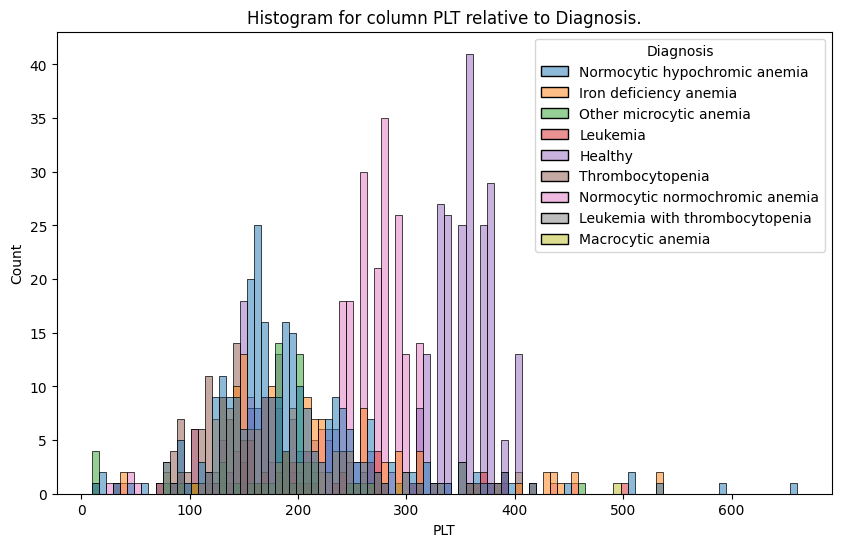

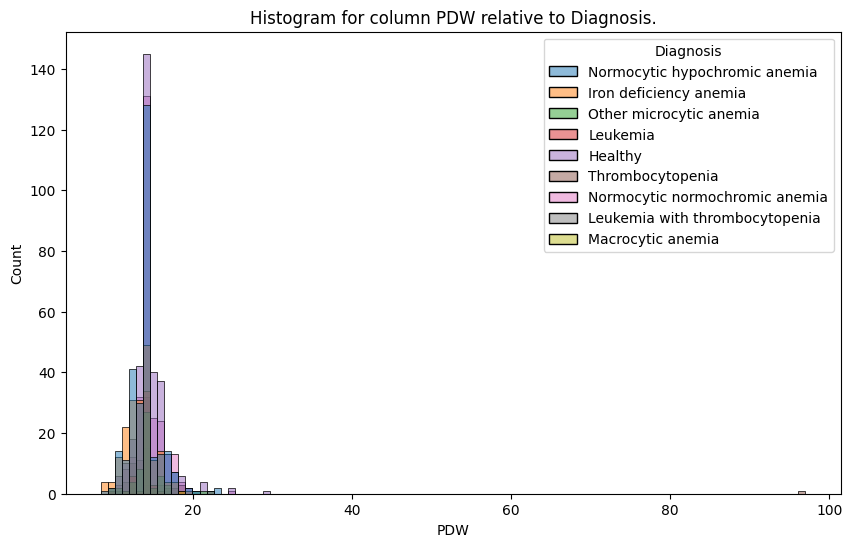

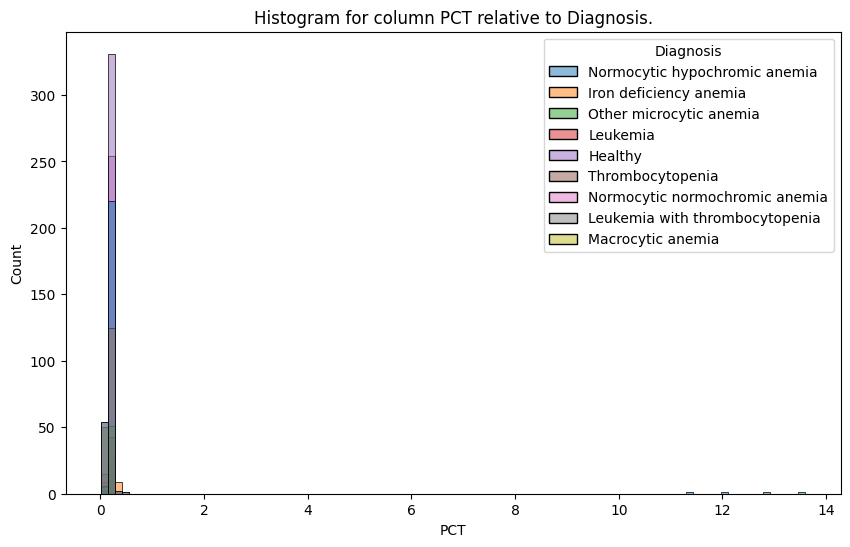

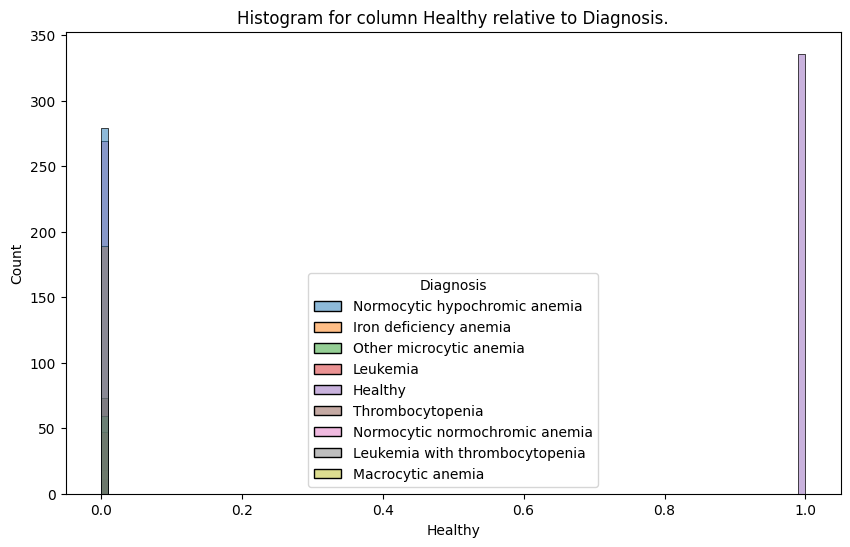

In [768]:
for col in data.columns:
    if col != 'Diagnosis':    
        plt.figure(figsize=(10, 6))
        sns.histplot(data=data, x=col, hue='Diagnosis', bins=100)
        plt.title(f'Histogram for column {col} relative to Diagnosis.')
        plt.show()

As we can see, a considerable number of features, such as PCT, MCH, and HCT, are quite difficult to interpret and may be of little use. However, there are features that show greater differences across various diagnoses, such as PLT and WBC. For now, let's simplify our modeling by encoding all 'Healthy' diagnoses as Healthy (1) and all other records as Unhealthy (0), and then look at the same visualization again.

In [510]:
data.loc[data['Diagnosis'] == 'Healthy', 'Healthy'] = 1
data.loc[data['Diagnosis'] != 'Healthy', 'Healthy'] = 0


In [511]:
data.head()

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis,Healthy
0,10.0,43.2,50.1,4.3,5.0,2.77,7.3,24.2,87.7,26.3,30.1,189.0,12.5,0.17,Normocytic hypochromic anemia,0.0
1,10.0,42.4,52.3,4.2,5.3,2.84,7.3,25.0,88.2,25.7,20.2,180.0,12.5,0.16,Normocytic hypochromic anemia,0.0
2,7.2,30.7,60.7,2.2,4.4,3.97,9.0,30.5,77.0,22.6,29.5,148.0,14.3,0.14,Iron deficiency anemia,0.0
3,6.0,30.2,63.5,1.8,3.8,4.22,3.8,32.8,77.9,23.2,29.8,143.0,11.3,0.12,Iron deficiency anemia,0.0
4,4.2,39.1,53.7,1.6,2.3,3.93,0.4,316.0,80.6,23.9,29.7,236.0,12.8,0.22,Normocytic hypochromic anemia,0.0


In [512]:
data['Healthy'].value_counts()

Healthy
0.0    945
1.0    336
Name: count, dtype: int64

Given the values displayed in the previous cells, these data are still not ideal for us due to a significant imbalance. There are over three times more individuals with 'Healthy = 0' than 'Healthy = 1'. This imbalance may impact the performance of our model, but we are not concerned about it.

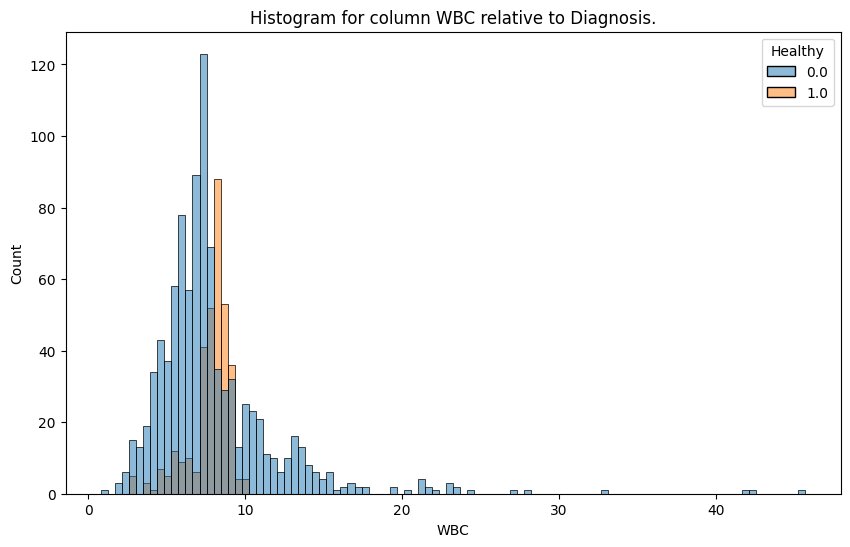

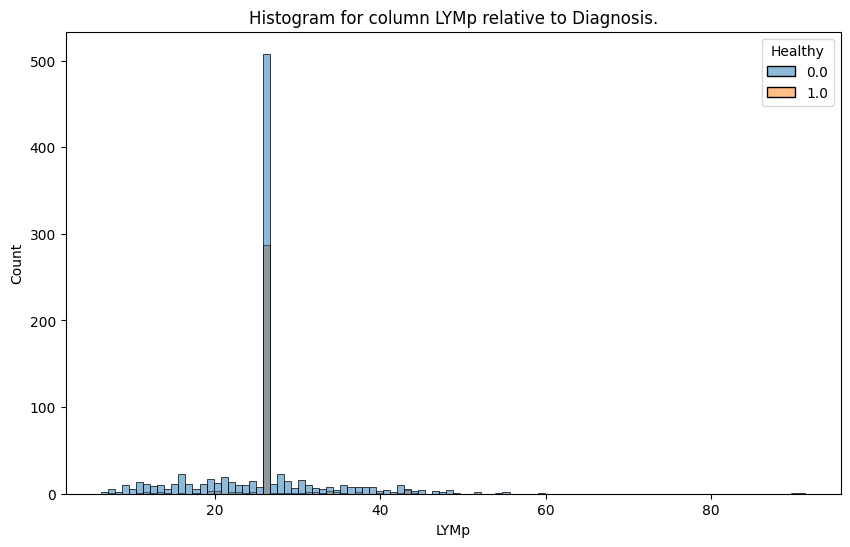

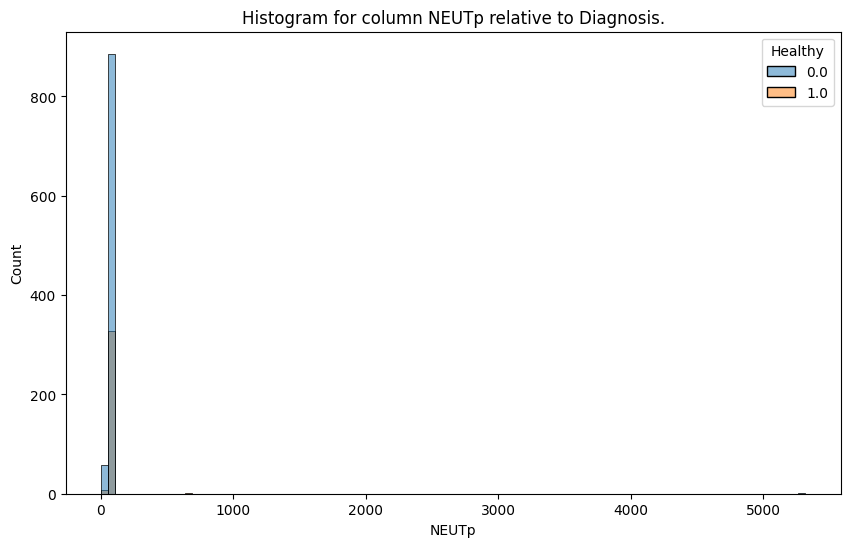

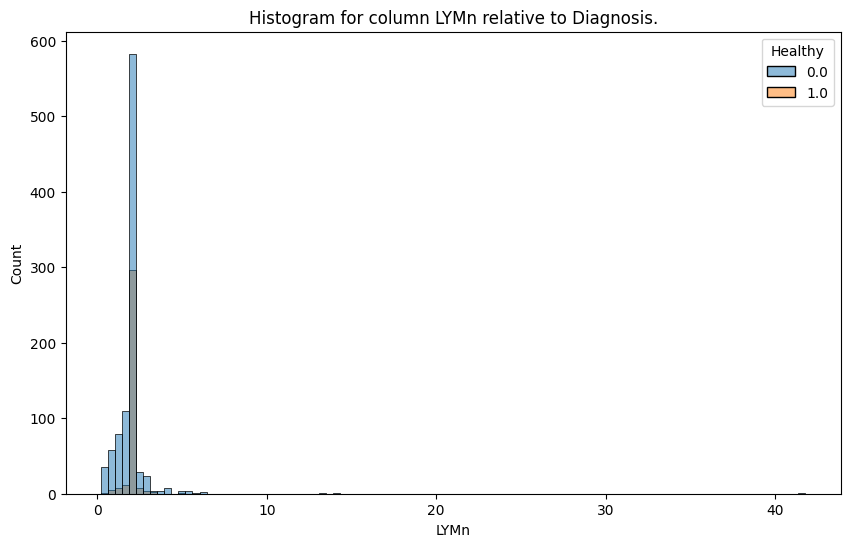

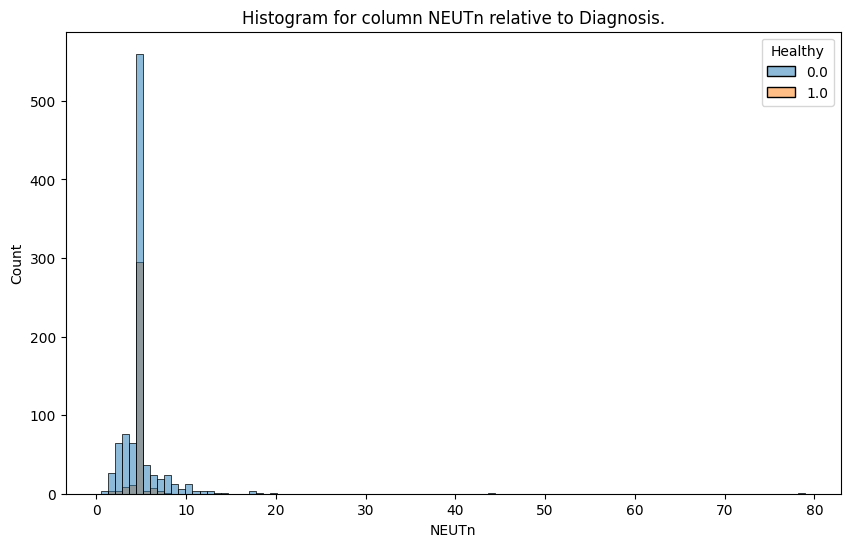

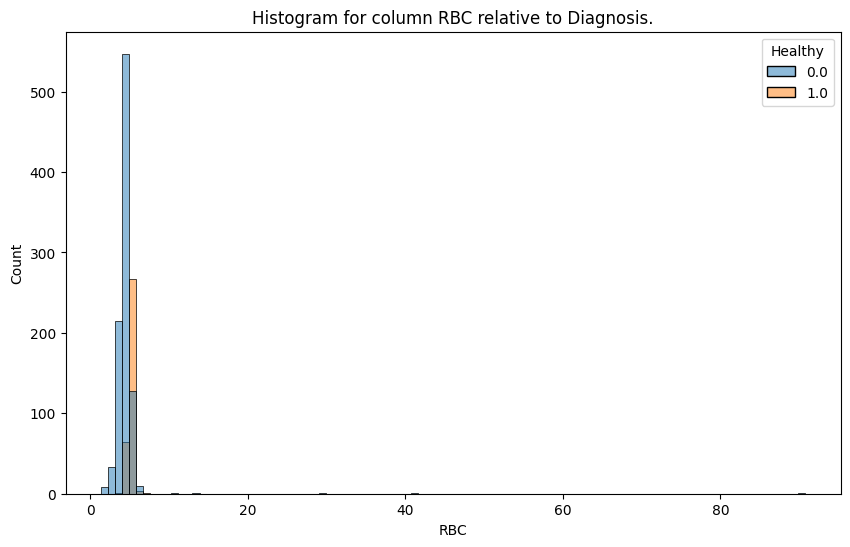

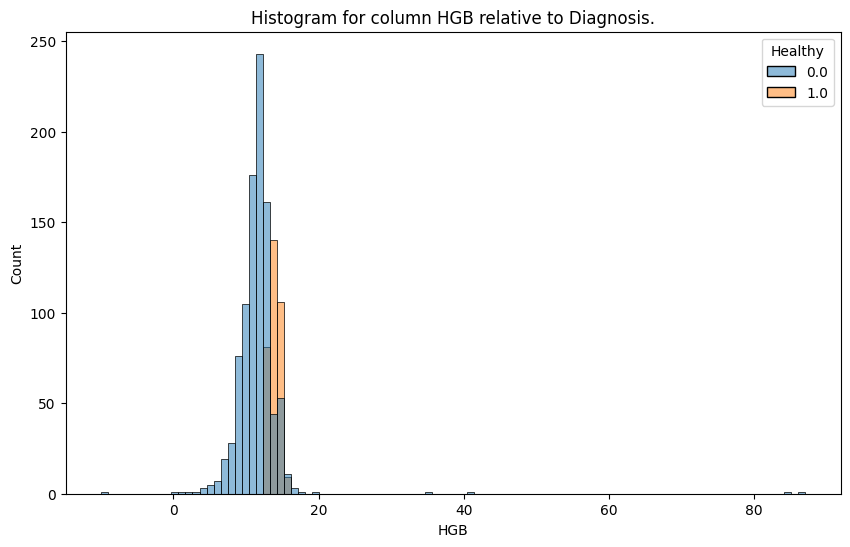

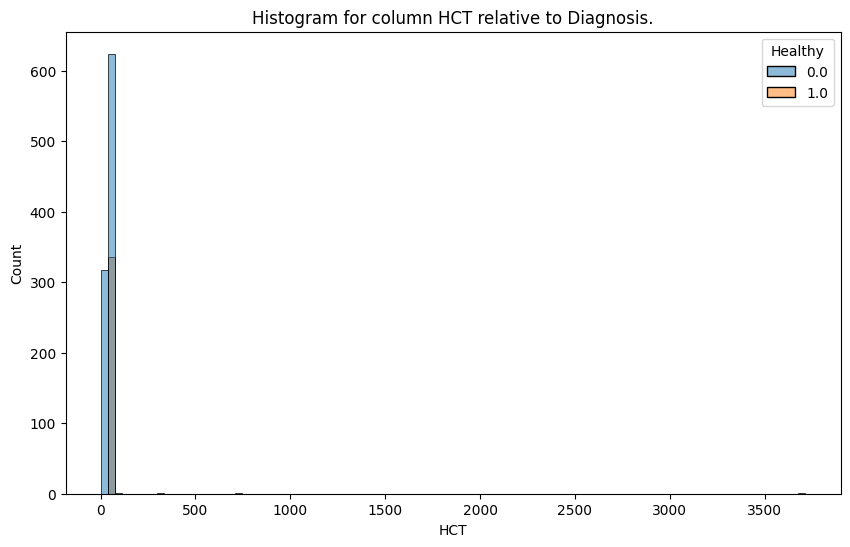

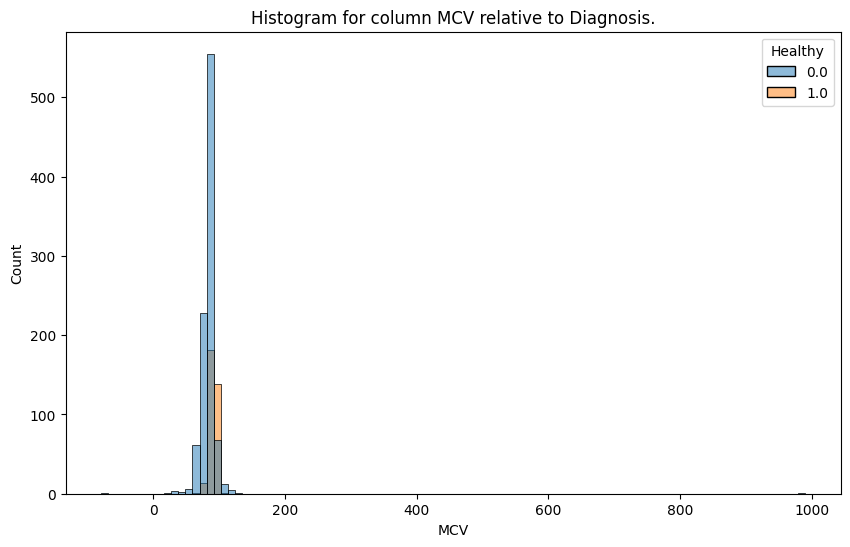

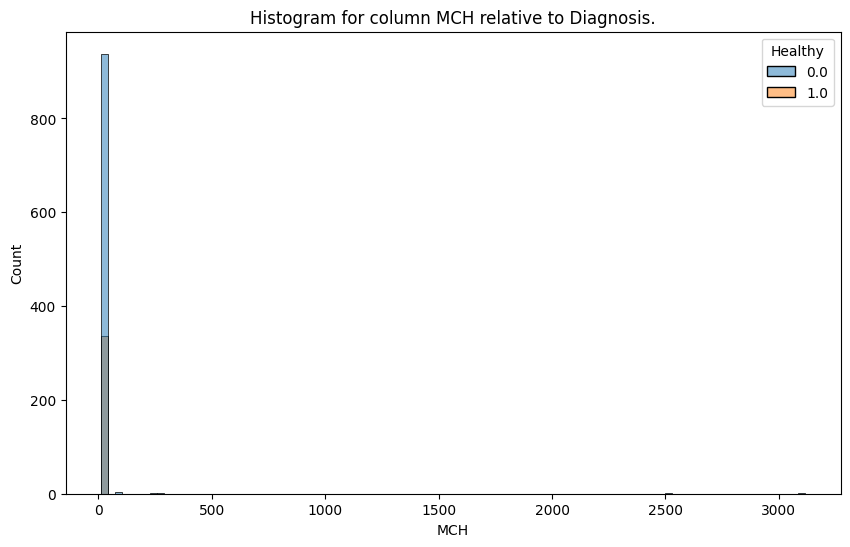

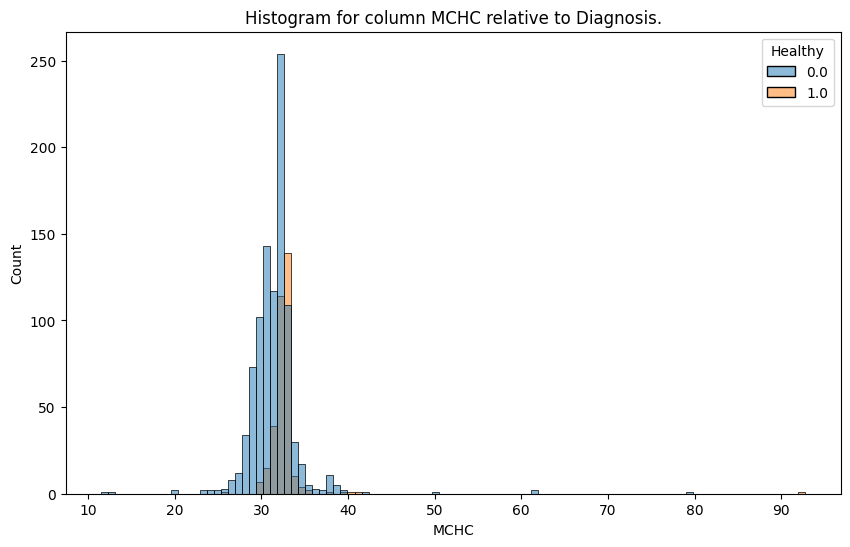

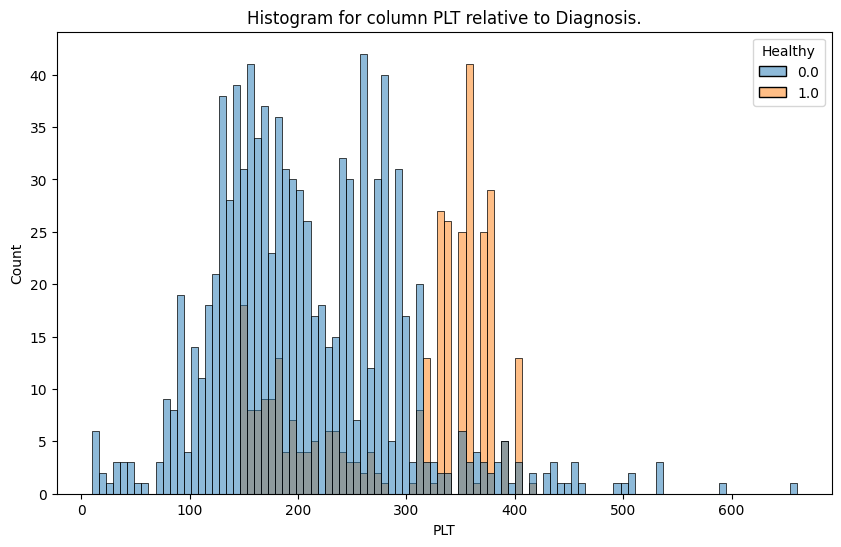

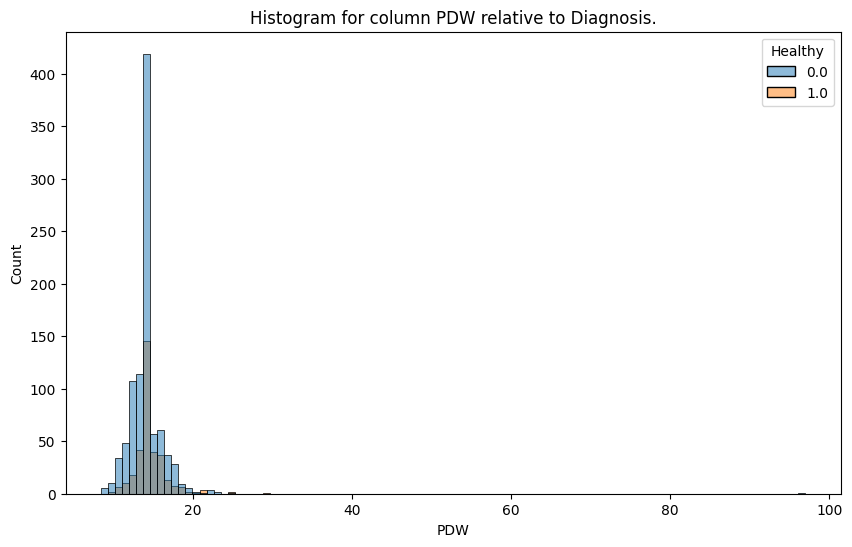

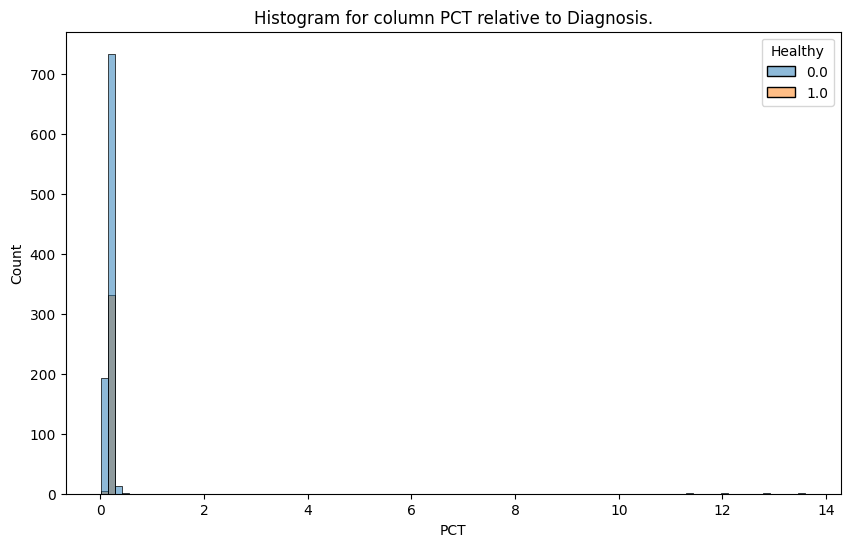

In [769]:
for col in data.drop(columns='Diagnosis').columns:
    if col != 'Healthy':    
        plt.figure(figsize=(10, 6))
        sns.histplot(data=data, x=col, hue='Healthy', bins=100)
        plt.title(f'Histogram for column {col} relative to Diagnosis.')
        plt.show()

What has happened here is that we have ensured that columns such as:

- PLT,
- WBC,
- HGB

play a leading role in our predictions. Let's see how our observations reflect the visualization of the correlation matrix using a heatmap.

<Axes: >

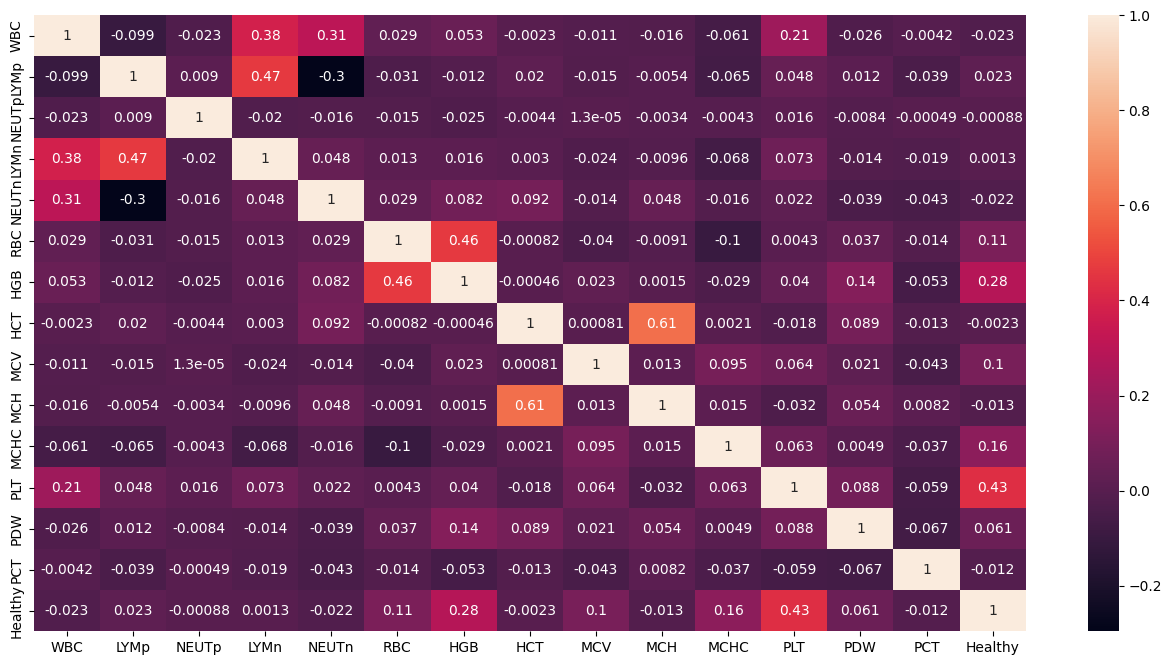

In [514]:
plt.figure(figsize=(16,8))
sns.heatmap(data.drop(columns='Diagnosis').corr(), annot=True)

The high correlation between Healthy and PLT or HGB only reinforces our suspicions. Let's now gradually move on to building our model (or models). Of course, let's start by dividing our data into independent variables and dependent variables. Remember that for now, we will focus on binary classification, so let's not forget to remove the Diagnosis column in the process.

In [515]:
X,y = data.drop(columns=['Diagnosis','Healthy']), data['Healthy']

Before we proceed to build the model correctly, let's check if we can somehow describe our dependent variables using two features. Here, PCA (Principal Component Analysis) will come to our aid, which will extract the most important information from our data. However, before we even apply PCA, we need to start with some data standardization, as PCA itself is very sensitive to it. Here, we'll use the StandardScaler function, which will transform our data in such a way that they have a mean equal to 0 and a standard deviation equal to 1. Then, we'll use the PCA function setting the parameter n_components = 2, allowing our unsupervised learning algorithm to extract two main feature components from the entire dataset. In both cases, we'll use the fit_transform() function right away because for now, we're operating on the entire dataset, not the divided one. Finally, we'll visualize our data.

In [516]:
X_scaled = StandardScaler().fit_transform(X)
X_scaled_pca = PCA(n_components=2).fit_transform(X_scaled)

data_plot = pd.DataFrame(data=X_scaled_pca, columns=['PC1', 'PC2'])
data_plot['Healthy'] = y

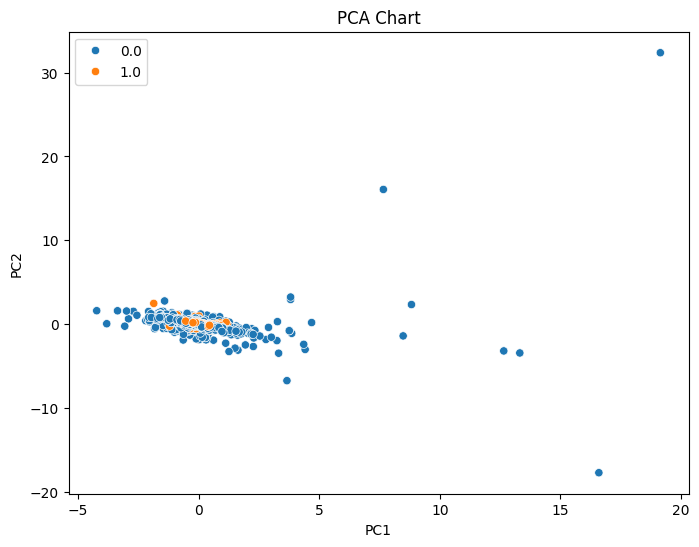

In [770]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_plot, x='PC1', y='PC2', hue='Healthy')
plt.title('PCA Chart')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


# 2. Binary classification

As you can easily notice, distinguishing our two classes using only two features is practically impossible. We could have expected this by looking at the previous histplots, however, it was good to make sure.

Now we move on to the proper model construction. We start by splitting our dataset into training data and test data.

In [518]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, stratify=y)

In [519]:
X_train.shape, X_test.shape

((960, 14), (321, 14))

At the very beginning, we will assess the performance of logistic regression, testing several examples with different values of the regularization parameter.

In [520]:
pipeline = make_pipeline(
    StandardScaler(),
    PCA(),
    LogisticRegression()
)

param_grid =[
    {
        'pca__n_components': [4, 6, 8, 10, 12, 14],
        'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
    }
]

gridsearch1 = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=10).fit(X_train,y_train)

In [521]:
gridsearch1.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=12)),
                ('logisticregression', LogisticRegression(C=100))])

In [522]:
gridsearch1.best_score_

0.8979166666666666

In [523]:
gridsearch1.score(X_test,y_test)

0.8691588785046729

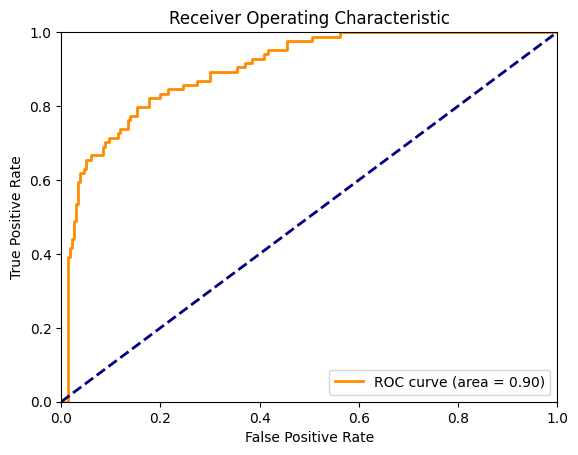

In [524]:
y_scores = gridsearch1.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Text(95.72222222222221, 0.5, 'Actuval Value')

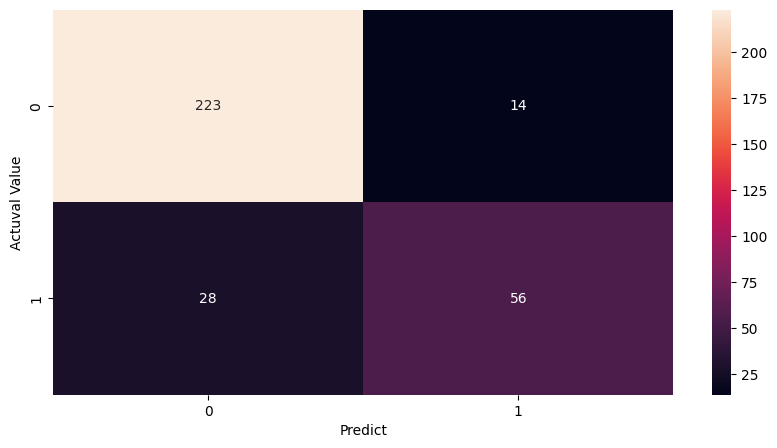

In [525]:
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test,gridsearch1.predict(X_test)), annot=True, fmt='d')
plt.xlabel('Predict')
plt.ylabel('Actuval Value')

As we can see, logistic regression alone can achieve a fairly high score, reaching up to 87% on the training set. This is already quite satisfactory for us. However, let's try something more complex. We move on to Support Vector Machines (SVM), which in the scikit-learn package are defined as SVR for regression and SVC for classification. To expand our test panel, we won't rely on just one type of kernel. We'll use the RBF kernel, based on the radial basis function, as well as the linear kernel. The grid of parameters created is quite extensive, which may lead to longer waiting times for the final result.

In [636]:
pipeline1 = make_pipeline(
    StandardScaler(),
    PCA(),
    SVC(probability=True)
)

In [639]:
param_grid =[
    {
        'pca__n_components': [10, 12, 14],
        "svc__kernel": ['rbf'], 
        'svc__C': [0.01, 0.1, 1, 10, 50, 100], 
        'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 50]
    },
    {
        'pca__n_components': [10, 12, 14],
        'svc__kernel': ['linear'], 
        'svc__C': [0.001, 0.01, 0.1, 1, 10, 50, 100]
    }
]

In [640]:
gridsearch1 = GridSearchCV(estimator=pipeline1, param_grid=param_grid, cv=10).fit(X_train,y_train)

In [641]:
gridsearch1.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=14)),
                ('svc', SVC(C=50, gamma=0.1, probability=True))])

In [642]:
gridsearch1.best_score_

0.9541666666666666

In [643]:
gridsearch1.score(X_test,y_test)

0.956386292834891

Text(95.72222222222221, 0.5, 'Actuval Value')

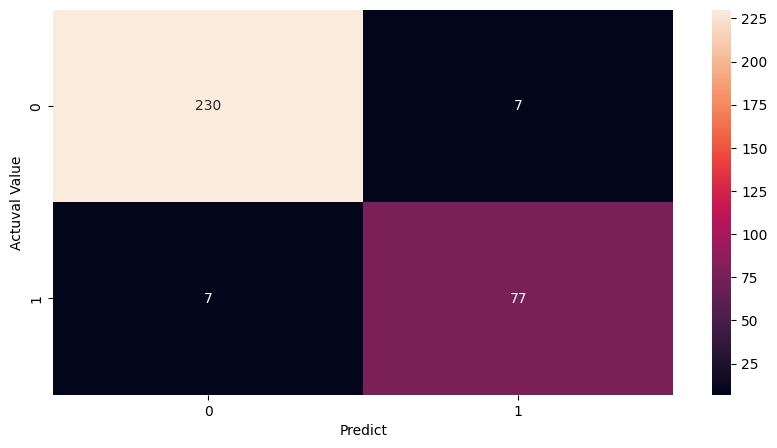

In [644]:
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test,gridsearch1.predict(X_test)), annot=True, fmt='d')
plt.xlabel('Predict')
plt.ylabel('Actuval Value')

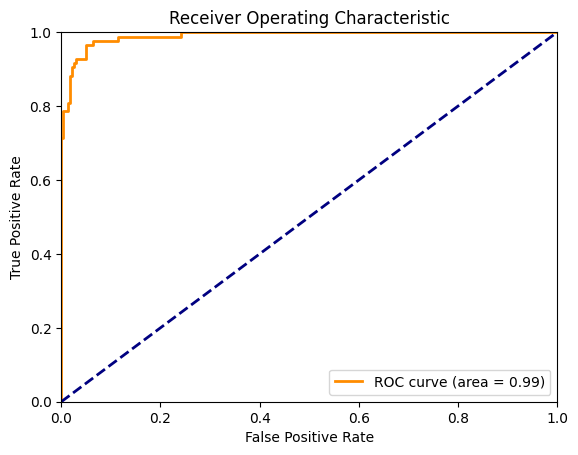

In [645]:
y_scores = gridsearch1.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

As we can see, right from the start, we obtained a model that has over 95% accuracy on the test set, which may already be quite satisfactory for us. Our model selected the version with 14 components, which is the same number of initial features. However, there's no time to rest on our laurels; let's visualize how this accuracy looks against all parameters. It seems to me that the best idea would be to visualize specifically for n_components = 14, so we'll adopt that tactic.

In [646]:
results = pd.DataFrame(gridsearch1.cv_results_)
filtered_results = results.loc[results['param_pca__n_components'] == 14].dropna() #dropna usuwa nam wiersze gdzie nie ma gammy, czyli te linearne svm
filtered_results = filtered_results[['param_svc__C', 'param_svc__gamma', 'mean_test_score']]

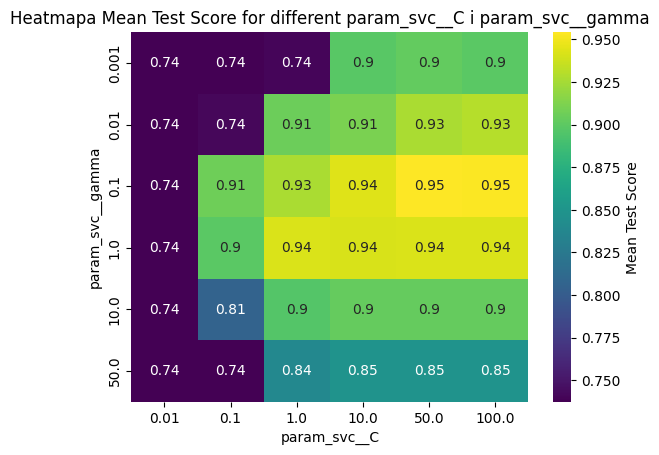

In [647]:
pivot_table = filtered_results.pivot(index="param_svc__gamma", columns="param_svc__C", values="mean_test_score")

sns.heatmap(pivot_table, annot=True, cmap="viridis", cbar_kws={'label': 'Mean Test Score'})
plt.title('Heatmapa Mean Test Score for different param_svc__C i param_svc__gamma')
plt.xlabel('param_svc__C')
plt.ylabel('param_svc__gamma')
plt.show()

What conclusions can we draw from the above analysis? Certainly, we can see that we can shift significantly to the "right" in terms of the C parameter values. It is in this direction that the accuracy of models increases, so we can expect that with an increase in the C parameter, our model should be more accurate. Let's check our conclusions in practice.

In [648]:
param_grid =[
    {
        'pca__n_components': [12,13,14],
        "svc__kernel": ['rbf'], 
        'svc__C': [10, 50, 100 , 500, 1000, 5000, 10000], 
        'svc__gamma': [0.00001,0.0001,0.001, 0.01, 0.1, 1, 10]
    },
]
gridsearch1 = GridSearchCV(estimator=pipeline1, param_grid=param_grid, cv=10).fit(X_train,y_train)
gridsearch1.best_estimator_


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=14)),
                ('svc', SVC(C=5000, gamma=0.01, probability=True))])

In [649]:
gridsearch1.best_score_

0.9572916666666668

In [650]:
gridsearch1.score(X_test,y_test)

0.9470404984423676

In [651]:
results = pd.DataFrame(gridsearch1.cv_results_)
filtered_results = results.loc[results['param_pca__n_components'] == 14]
filtered_results = filtered_results[['param_svc__C', 'param_svc__gamma', 'mean_test_score']]

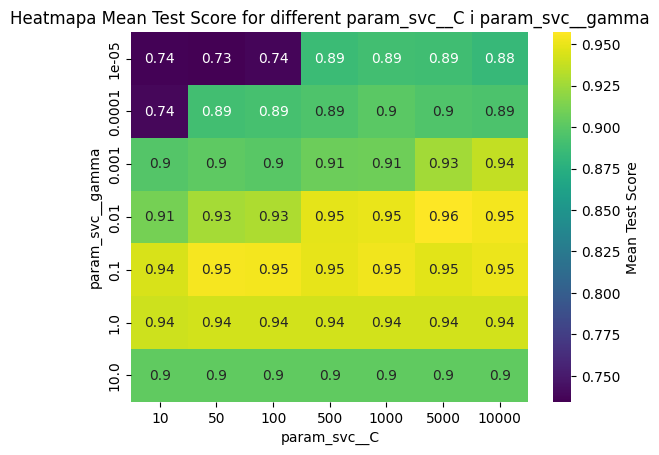

In [652]:
pivot_table = filtered_results.pivot(index="param_svc__gamma", columns="param_svc__C", values="mean_test_score")

sns.heatmap(pivot_table, annot=True, cmap="viridis", cbar_kws={'label': 'Mean Test Score'})
plt.title('Heatmapa Mean Test Score for different param_svc__C i param_svc__gamma')
plt.xlabel('param_svc__C')
plt.ylabel('param_svc__gamma')
plt.show()

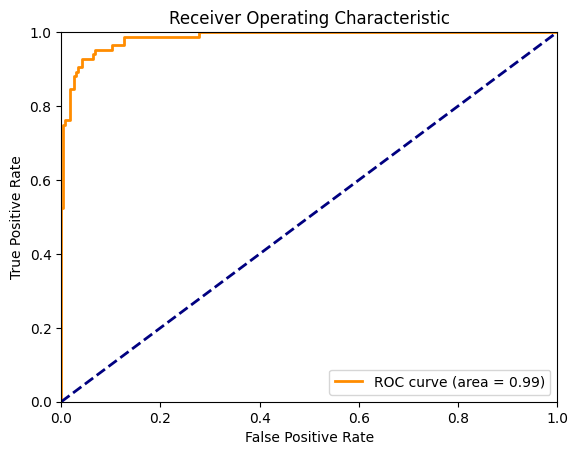

In [653]:
y_scores = gridsearch1.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

What results did we get? Theoretically, the model improved, but it improved on the training set, which doesn't entirely satisfy us. We would prefer our model to generalize as well as possible rather than perform optimally on the training set. However, there's no need to lose hope; let's try manipulating the grid search parameters a bit more, now focusing only on n_components = 14.

In [654]:
param_grid =[
    {
        'pca__n_components': [14],
        "svc__kernel": ['rbf'], 
        'svc__C': np.arange(1000,11000,1000), 
        'svc__gamma': np.linspace(0.001, 0.1,10)
    },
]
gridsearch1 = GridSearchCV(estimator=pipeline1, param_grid=param_grid, cv=5).fit(X_train,y_train)
gridsearch1.best_estimator_


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=14)),
                ('svc',
                 SVC(C=1000, gamma=0.023000000000000003, probability=True))])

In [655]:
gridsearch1.score(X_test,y_test)

0.9532710280373832

In [656]:
results = pd.DataFrame(gridsearch1.cv_results_)
filtered_results = results.loc[results['param_pca__n_components'] == 14]
filtered_results = filtered_results[['param_svc__C', 'param_svc__gamma', 'mean_test_score']]

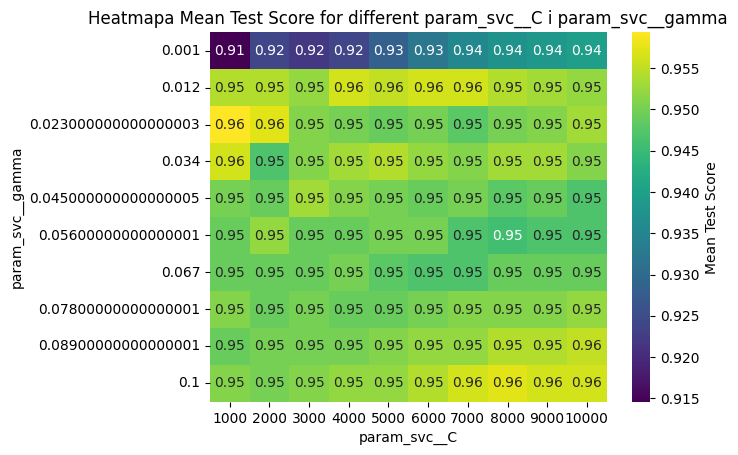

In [657]:
pivot_table = filtered_results.pivot(index="param_svc__gamma", columns="param_svc__C", values="mean_test_score")

sns.heatmap(pivot_table, annot=True, cmap="viridis", cbar_kws={'label': 'Mean Test Score'})
plt.title('Heatmapa Mean Test Score for different param_svc__C i param_svc__gamma')
plt.xlabel('param_svc__C')
plt.ylabel('param_svc__gamma')
plt.show()

In [658]:
param_grid =[
    {
        'pca__n_components': [14],
        "svc__kernel": ['rbf'], 
        'svc__C': np.linspace(500,1100,10), 
        'svc__gamma': np.linspace(0.01, 0.04,10)
    },
]
gridsearch1 = GridSearchCV(estimator=pipeline1, param_grid=param_grid, cv=5).fit(X_train,y_train)
gridsearch1.best_estimator_


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=14)),
                ('svc',
                 SVC(C=766.6666666666667, gamma=0.026666666666666665,
                     probability=True))])

In [659]:
gridsearch1.score(X_test,y_test)

0.956386292834891

In [660]:
results = pd.DataFrame(gridsearch1.cv_results_)
filtered_results = results.loc[results['param_pca__n_components'] == 14]
filtered_results = filtered_results[['param_svc__C', 'param_svc__gamma', 'mean_test_score']]

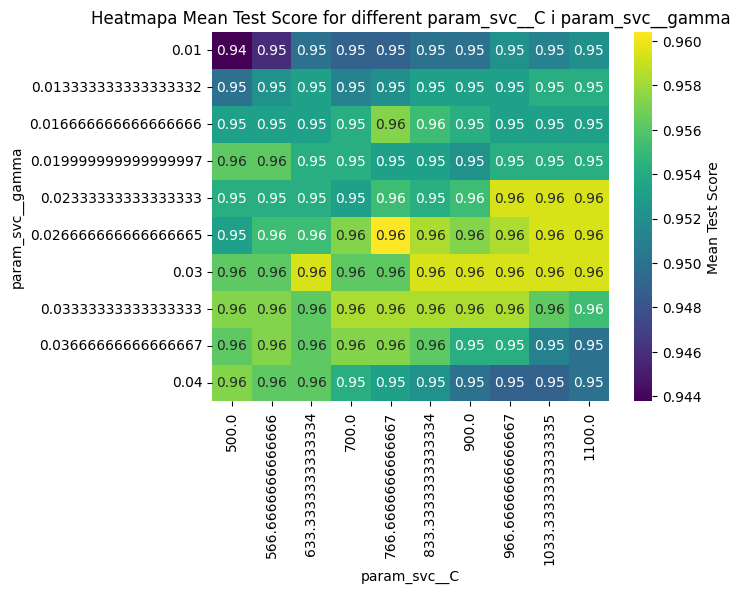

In [661]:
pivot_table = filtered_results.pivot(index="param_svc__gamma", columns="param_svc__C", values="mean_test_score")

sns.heatmap(pivot_table, annot=True, cmap="viridis", cbar_kws={'label': 'Mean Test Score'})
plt.title('Heatmapa Mean Test Score for different param_svc__C i param_svc__gamma')
plt.xlabel('param_svc__C')
plt.ylabel('param_svc__gamma')
plt.show()

In [662]:
param_grid =[
    {
        'pca__n_components': [14],
        "svc__kernel": ['rbf'], 
        'svc__C': np.linspace(6000,10000,10), 
        'svc__gamma': np.linspace(0.05, 0.2,10)
    },
]
gridsearch1 = GridSearchCV(estimator=pipeline1, param_grid=param_grid, cv=5).fit(X_train,y_train)
gridsearch1.best_estimator_


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=14)),
                ('svc',
                 SVC(C=6000.0, gamma=0.11666666666666668, probability=True))])

In [663]:
gridsearch1.score(X_test,y_test)

0.956386292834891

In [664]:
results = pd.DataFrame(gridsearch1.cv_results_)
filtered_results = results.loc[results['param_pca__n_components'] == 14]
filtered_results = filtered_results[['param_svc__C', 'param_svc__gamma', 'mean_test_score']]

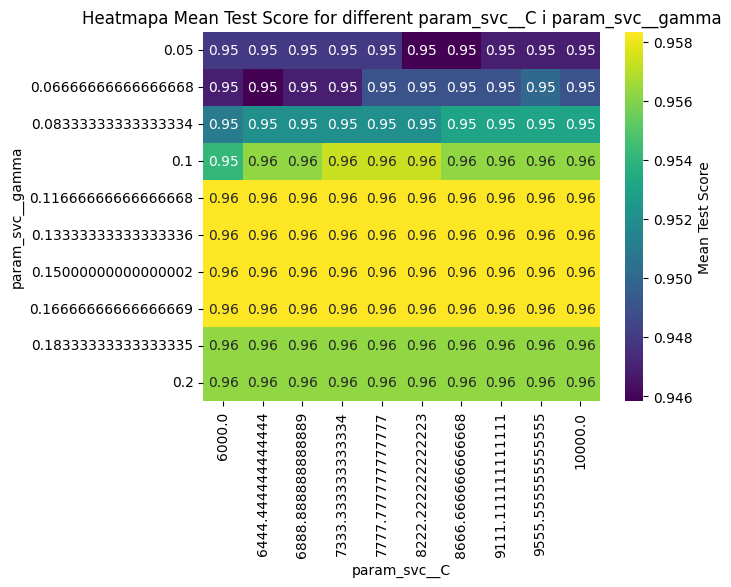

In [665]:
pivot_table = filtered_results.pivot(index="param_svc__gamma", columns="param_svc__C", values="mean_test_score")

sns.heatmap(pivot_table, annot=True, cmap="viridis", cbar_kws={'label': 'Mean Test Score'})
plt.title('Heatmapa Mean Test Score for different param_svc__C i param_svc__gamma')
plt.xlabel('param_svc__C')
plt.ylabel('param_svc__gamma')
plt.show()

In [666]:
param_grid =[
    {
        'pca__n_components': [14],
        "svc__kernel": ['rbf'], 
        'svc__C': np.linspace(3000,13000,15), 
        'svc__gamma': np.linspace(0.05, 0.2,10)
    },
]
gridsearch1 = GridSearchCV(estimator=pipeline1, param_grid=param_grid, cv=5).fit(X_train,y_train)
gridsearch1.best_estimator_


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=14)),
                ('svc',
                 SVC(C=3000.0, gamma=0.15000000000000002, probability=True))])

In [667]:
gridsearch1.score(X_test,y_test)

0.9532710280373832

In [668]:
results = pd.DataFrame(gridsearch1.cv_results_)
filtered_results = results.loc[results['param_pca__n_components'] == 14]
filtered_results = filtered_results[['param_svc__C', 'param_svc__gamma', 'mean_test_score']]

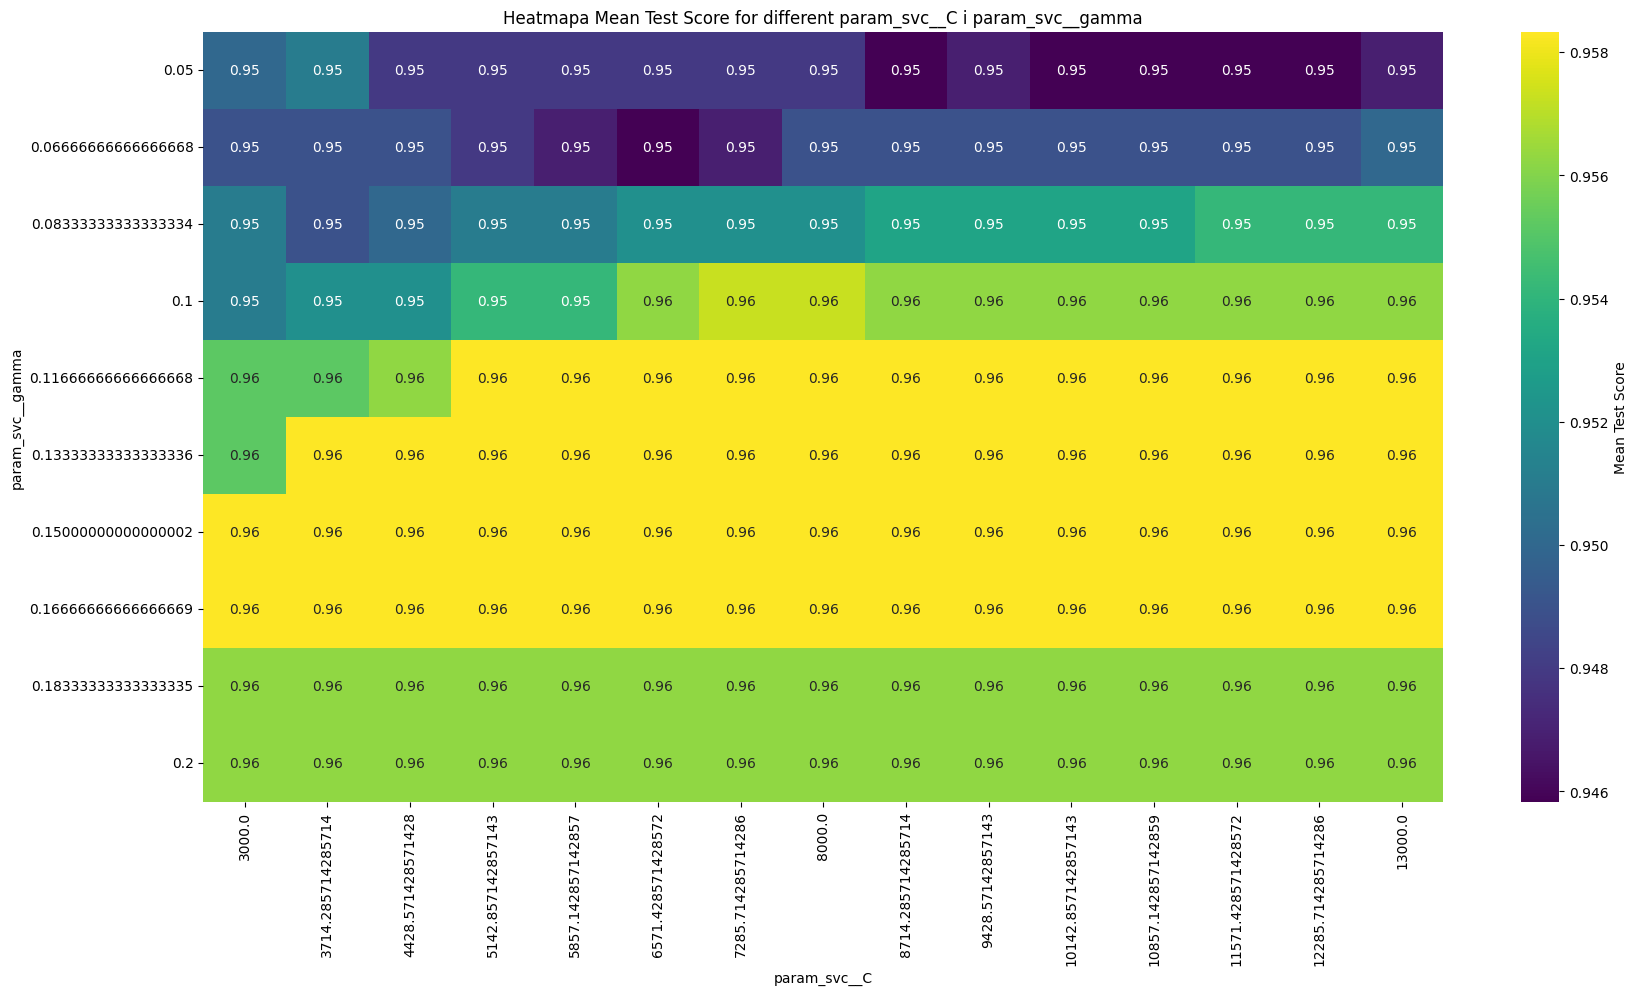

In [669]:
pivot_table = filtered_results.pivot(index="param_svc__gamma", columns="param_svc__C", values="mean_test_score")

plt.figure(figsize=(20,10))
sns.heatmap(pivot_table, annot=True, cmap="viridis", cbar_kws={'label': 'Mean Test Score'})
plt.title('Heatmapa Mean Test Score for different param_svc__C i param_svc__gamma')
plt.xlabel('param_svc__C')
plt.ylabel('param_svc__gamma')
plt.show()

In [670]:
param_grid =[
    {
        'pca__n_components': [14],
        "svc__kernel": ['rbf'], 
        'svc__C': np.linspace(3000,100000000,30), 
        'svc__gamma': np.linspace(0.05, 0.2,10)
    },
]
gridsearch1 = GridSearchCV(estimator=pipeline1, param_grid=param_grid, cv=10).fit(X_train,y_train)
gridsearch1.best_estimator_


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=14)),
                ('svc',
                 SVC(C=3000.0, gamma=0.16666666666666669, probability=True))])

In [671]:
gridsearch1.score(X_test,y_test)

0.956386292834891

In [672]:
results = pd.DataFrame(gridsearch1.cv_results_)
filtered_results = results.loc[results['param_pca__n_components'] == 14]
filtered_results = filtered_results[['param_svc__C', 'param_svc__gamma', 'mean_test_score']]

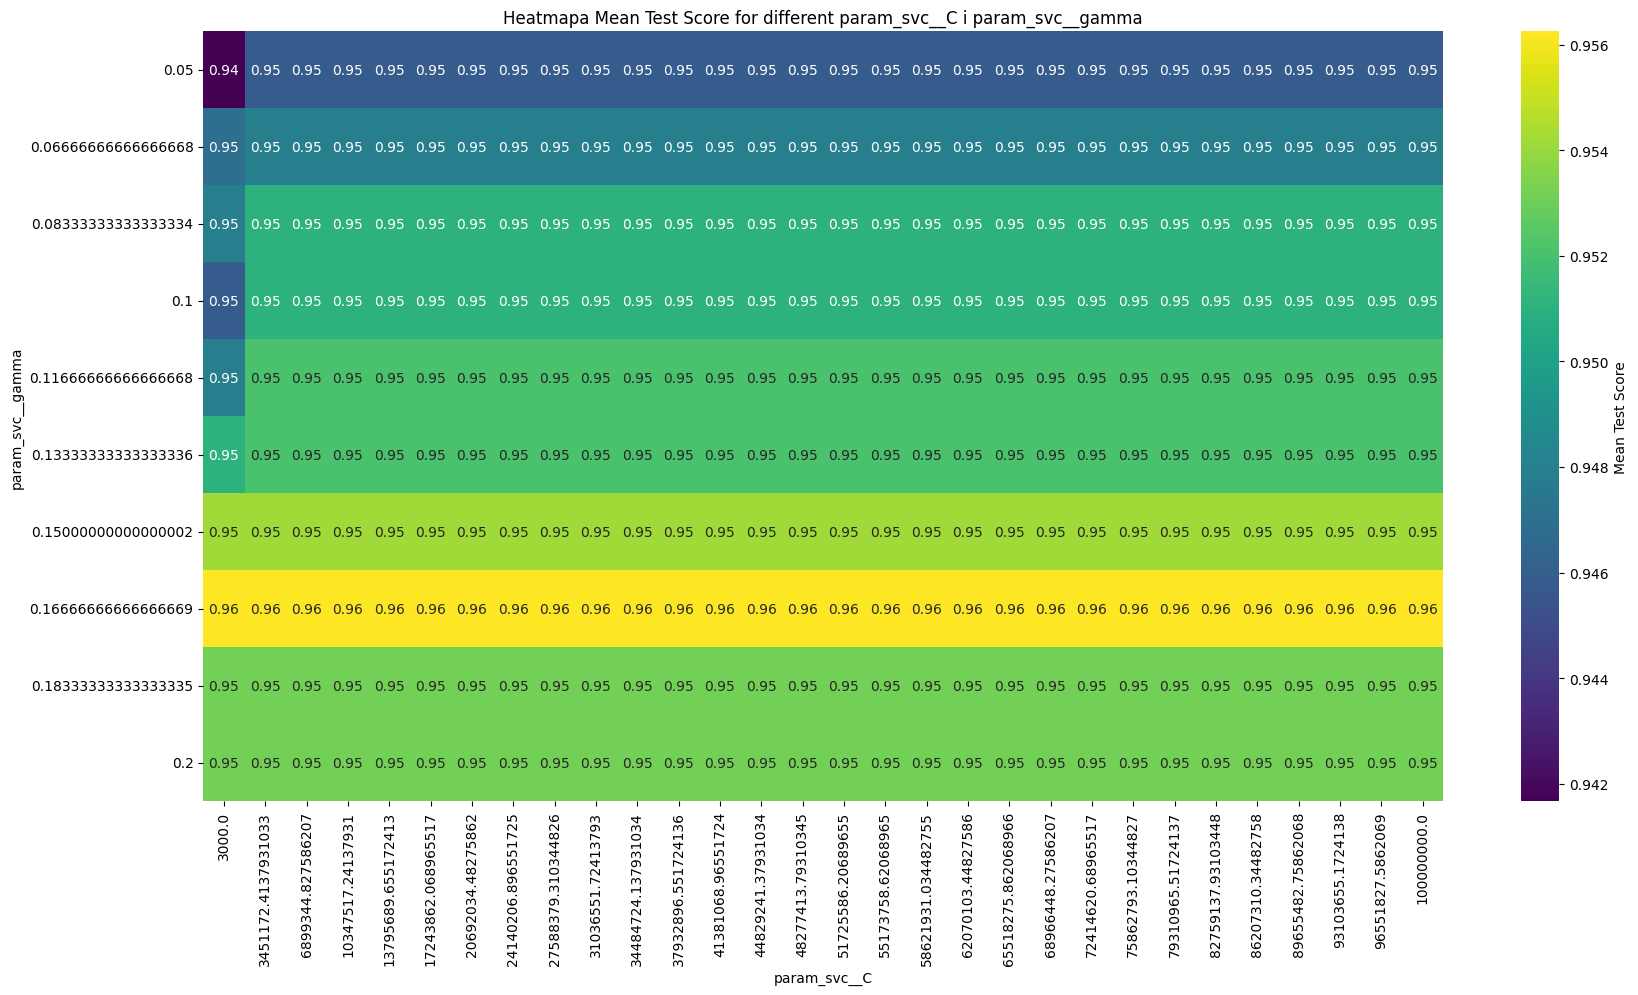

In [673]:
pivot_table = filtered_results.pivot(index="param_svc__gamma", columns="param_svc__C", values="mean_test_score")

plt.figure(figsize=(20,10))
sns.heatmap(pivot_table, annot=True, cmap="viridis", cbar_kws={'label': 'Mean Test Score'})
plt.title('Heatmapa Mean Test Score for different param_svc__C i param_svc__gamma')
plt.xlabel('param_svc__C')
plt.ylabel('param_svc__gamma')
plt.show()

Text(95.72222222222221, 0.5, 'Actuval Value')

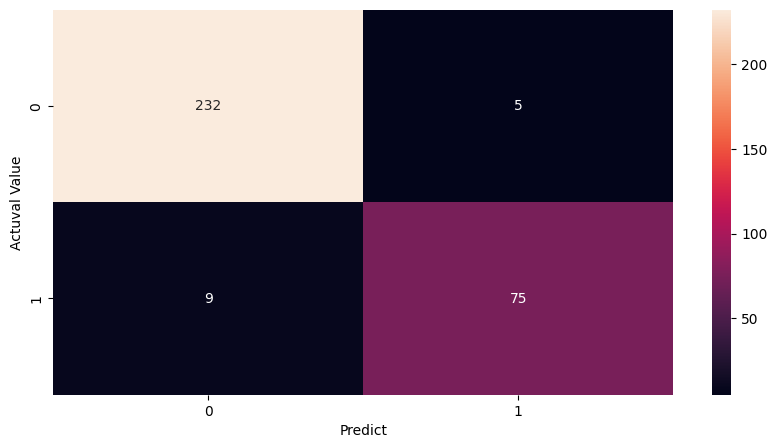

In [674]:
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test,gridsearch1.predict(X_test)), annot=True, fmt='d')
plt.xlabel('Predict')
plt.ylabel('Actuval Value')

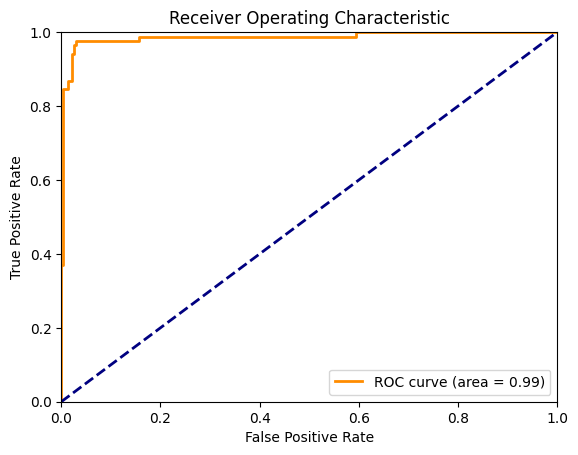

In [675]:
y_scores = gridsearch1.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

After trying several different configurations, on various intervals, with different numbers of steps, where did it lead us? Unfortunately, we didn't find a better model than our initial one, but there's no need to be discouraged because the model is still satisfactory, if not very good. An accuracy level of nearly 96% is impressive. Now we can try using the TensorFlow package and create a neural network based on gradient-based methods.

In [676]:
model = Sequential()
model.add(layers.Flatten(input_shape=(14,1)))
model.add(layers.Dense(200,activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.summary()

c:\Users\pawel.drzyzga\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 14)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 200)            │         3,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │           402 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,402 (13.29 KB)

 Trainable params: 3,402 (13.29 KB)

 Non-trainable params: 0 (0.00 B)

In [677]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)

In [678]:
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

In [685]:
scalar = StandardScaler().fit(X_train)
X_train_scaled = scalar.transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [686]:
history = model.fit(X_train,y_train, batch_size=1024,epochs=100,validation_split=.10)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.8877 - loss: 0.3301 - val_accuracy: 0.8854 - val_loss: 0.3247
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8866 - loss: 0.3289 - val_accuracy: 0.8958 - val_loss: 0.3241
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.8866 - loss: 0.3277 - val_accuracy: 0.8958 - val_loss: 0.3223
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8877 - loss: 0.3262 - val_accuracy: 0.8958 - val_loss: 0.3200
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.8877 - loss: 0.3247 - val_accuracy: 0.8958 - val_loss: 0.3177
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.8877 - loss: 0.3229 - val_accuracy: 0.8958 - val_loss: 0.3156
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.8889 - loss: 0.3215 - val_accuracy: 0.8958 - val_loss: 0.3133
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8877 - loss: 0.3200 - val_accuracy: 0.8854 - val_loss:

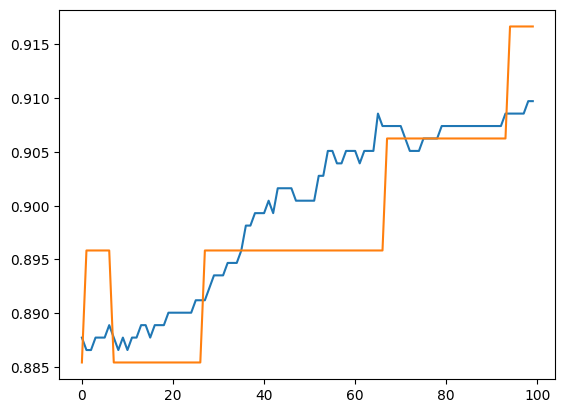

In [687]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

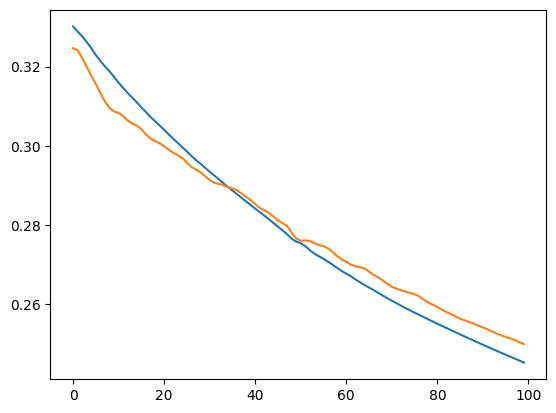

In [688]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [689]:
model.evaluate(X_test,y_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - accuracy: 0.8964 - loss: 0.2673


[0.27646055817604065, 0.8878504633903503]

We've obtained a model with fairly good accuracy, although significantly different from what we got with Support Vector Machines. Based on the results we obtained, we can infer that the model might be slightly overfitting, which is something we should definitely pay attention to in further work with this model. However, we'll leave this neural network as it is and move on to testing Extreme Learning Machine (ELM), which is a type of Single Hidden Layer Feedforward Network. Our ELM class is located in the file ELM.py, which we have already imported at the beginning. It's worth mentioning that it takes three main input parameters during initialization: the number of features, the number of hidden neurons, and the number of classes.

In [741]:
model2 = ELM(
    14,
    200,
    2
)

In [742]:
y_train_onehot = to_categorical(y_train,2)
y_test_onehot = to_categorical(y_test,2)
model2.fit(X_train_scaled,y_train_onehot)

In [743]:
train_pred = model2.pred(X_train_scaled)
test_pred = model2.pred(X_test_scaled)
model2.acc(train_pred,y_train),model2.acc(test_pred,y_test)

(0.959375, 0.9221183800623053)

As we can see, with just a small number of hidden neurons, we achieved a model that is 92% accurate on the test set, making it a strong competitor for SVM. And remember, we're not introducing any additional parameters here. We can now check what the confusion matrix looks like for our results.

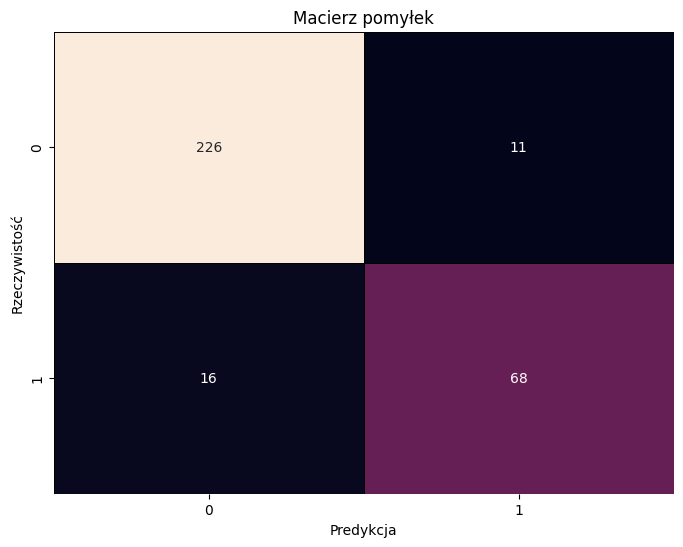

In [571]:
model2.cm(test_pred, y_test)

In [572]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94       237
         1.0       0.86      0.81      0.83        84

    accuracy                           0.92       321
   macro avg       0.90      0.88      0.89       321
weighted avg       0.91      0.92      0.92       321



It seems quite satisfying to me, although the classes themselves are not evenly balanced, our model generally makes mistakes evenly, both with healthy and sick individuals. Let's now try to conduct something akin to grid search, but without using cross-validation. Since our function doesn't come from the scikit-learn package, we'll write a short code that allows us to perform such grid search.

In [573]:
accuracy_list = pd.DataFrame(columns=['Number of features','Number of hidden neurons','Accuracy'])

for j in range(50,400,10):
    for i in [7,8,9,10,11,12,13,14]:
        pca = PCA(n_components=i).fit(X_train_scaled)
        X_train_pca = pca.transform(X_train_scaled)
        X_test_pca  = pca.transform(X_test_scaled)
        model = ELM(
        i,
        j,
        9
        )
        model.fit(X_train_pca, y_train_onehot)
        test_pred = model.pred(X_test_pca)
        accuracy = model.acc(test_pred, y_test)
        new_row = pd.DataFrame(columns=['Number of features','Number of hidden neurons','Accuracy'],data=[[i,j,accuracy]])
        accuracy_list = pd.concat([accuracy_list,new_row],ignore_index=True)

accuracy_list.loc[accuracy_list['Accuracy'] == accuracy_list['Accuracy'].max()]


C:\Users\pawel.drzyzga\AppData\Local\Temp\ipykernel_6588\3928860975.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  accuracy_list = pd.concat([accuracy_list,new_row],ignore_index=True)


,Number of features,Number of hidden neurons,Accuracy
133,12,210,0.931464
135,14,210,0.931464
219,10,320,0.931464


Text(95.72222222222221, 0.5, 'Actuval Value')

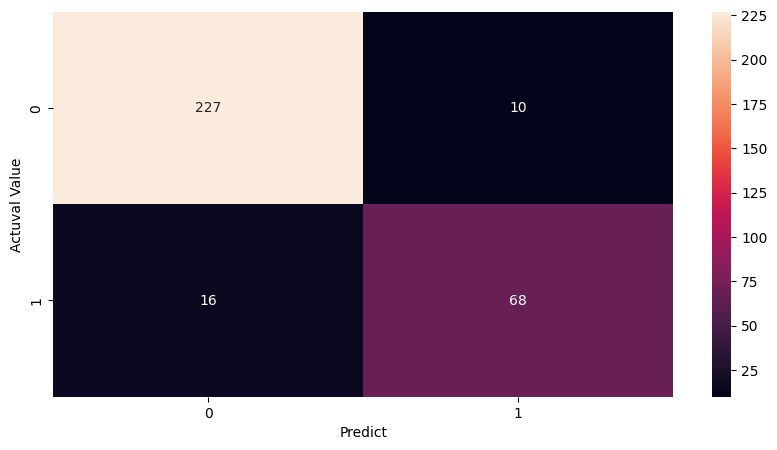

In [574]:
model = ELM(10,250,9)
pca = PCA(n_components=10).fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)
model.fit(X_train_pca,y_train_onehot)
pred = model.pred(X_test_pca)

plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test,pred), annot=True, fmt='d')
plt.xlabel('Predict')
plt.ylabel('Actuval Value')

Our search led us to find a model that generalizes effectively at a level of over 93%, which may not be as good as what we achieved with SVM, but it certainly can be promising. It's worth noting that the ELM itself is quite "rudimentary" in our case; if we were to expand it, add parameters, we could achieve even better results. Interestingly, the best result was obtained for a model with the parameter n_components = 10.

# 3. Multiclass classification

At the outset, of course, we need to get rid of the column that corresponds to our binary class division.

In [575]:
data2 = data.drop(columns=['Healthy'])
data2

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.00,43.200,50.100,4.30000,5.00000,2.77,7.3,24.2000,87.7,26.3,30.1,189.0,12.500000,0.17000,Normocytic hypochromic anemia
1,10.00,42.400,52.300,4.20000,5.30000,2.84,7.3,25.0000,88.2,25.7,20.2,180.0,12.500000,0.16000,Normocytic hypochromic anemia
2,7.20,30.700,60.700,2.20000,4.40000,3.97,9.0,30.5000,77.0,22.6,29.5,148.0,14.300000,0.14000,Iron deficiency anemia
3,6.00,30.200,63.500,1.80000,3.80000,4.22,3.8,32.8000,77.9,23.2,29.8,143.0,11.300000,0.12000,Iron deficiency anemia
4,4.20,39.100,53.700,1.60000,2.30000,3.93,0.4,316.0000,80.6,23.9,29.7,236.0,12.800000,0.22000,Normocytic hypochromic anemia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,4.40,25.845,77.511,1.88076,5.14094,4.86,13.5,46.1526,80.7,27.7,34.4,180.0,14.312512,0.26028,Healthy
1277,5.60,25.845,77.511,1.88076,5.14094,4.85,15.0,46.1526,91.7,31.0,33.8,215.0,14.312512,0.26028,Healthy
1278,9.20,25.845,77.511,1.88076,5.14094,4.47,13.1,46.1526,88.7,29.3,33.0,329.0,14.312512,0.26028,Healthy
1279,6.48,25.845,77.511,1.88076,5.14094,4.75,13.2,46.1526,86.7,27.9,32.1,174.0,14.312512,0.26028,Healthy


Now we will encode our data, which is essential when it comes to entering the topic of multiclass classification. Additionally, we will display our labels, which can help us in later interpretation.

In [576]:
data2['Diagnosis_cod'] = LabelEncoder().fit_transform(data2['Diagnosis'])
mapping_dict = {data2['Diagnosis'].unique()[i]: data2['Diagnosis_cod'].unique()[i] for i in range(len(data2['Diagnosis'].unique()))} 
X2 = data2.drop(columns=['Diagnosis','Diagnosis_cod'])
y2 = data2['Diagnosis_cod']
mapping_dict

{'Normocytic hypochromic anemia': 5,
 'Iron deficiency anemia': 1,
 'Other microcytic anemia': 7,
 'Leukemia': 2,
 'Healthy': 0,
 'Thrombocytopenia': 8,
 'Normocytic normochromic anemia': 6,
 'Leukemia with thrombocytopenia': 3,
 'Macrocytic anemia': 4}

Now we split the data and then apply one-hot encoding, which is necessary if we want to use our Extreme Learning Machine. We didn't do this earlier because we only had classes 0 and 1.

In [577]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=42, stratify=y2)

In [578]:
y2_train_onehot = to_categorical(y2_train, 9)
y2_test_onehot = to_categorical(y2_test, 9)

In [579]:
scaler = StandardScaler().fit(X2_train)
X2_train_scaled = scaler.transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)

We're starting by applying the Extreme Learning Machine, using random settings for now. Let's see what we come up with.

In [759]:
model = ELM(
    14,
    175,
    9
)

In [760]:
model.fit(X2_train_scaled, y2_train_onehot)

In [761]:
test_pred = model.pred(X2_test_scaled)

Text(95.72222222222221, 0.5, 'Actuval Value')

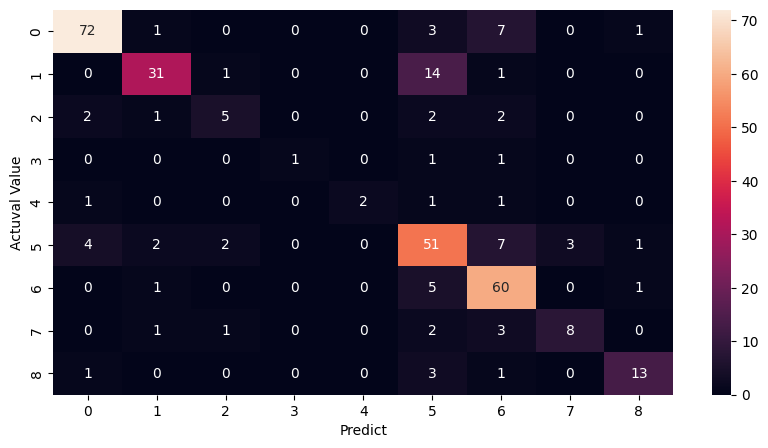

In [762]:
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y2_test,test_pred), annot=True, fmt='d')
plt.xlabel('Predict')
plt.ylabel('Actuval Value')

In [763]:
model.acc(test_pred, y2_test)

0.7570093457943925

To start, we're getting a model that has 75% accuracy on the training set. This isn't a bad result. We need to consider that we've entered into multiclass classification, which means not only do we have 9 classes instead of 2, but also that the imbalance in class sizes (as we observed at the beginning) may leave much to be desired. However, there's no need to despair; let's proceed to apply our grid search to try to find the best configuration for our Extreme Learning Machine.

In [766]:
accuracy_list = pd.DataFrame(columns=['Number of features','Number of hidden neurons','Accuracy'])
for j in range(100,350,5):
    for i in [10,11,12,13,14]:
        pca = PCA(n_components=i).fit(X2_train_scaled)
        X2_train_pca = pca.transform(X2_train_scaled)
        X2_test_pca  = pca.transform(X2_test_scaled)
        model = ELM(
        i,
        j,
        9
        )
        model.fit(X2_train_pca, y2_train_onehot)
        test_pred = model.pred(X2_test_pca)
        accuracy = model.acc(test_pred, y2_test)
        new_row = pd.DataFrame(columns=['Number of features','Number of hidden neurons','Accuracy'],data=[[i,j,accuracy]])
        accuracy_list = pd.concat([accuracy_list,new_row],ignore_index=True)

C:\Users\pawel.drzyzga\AppData\Local\Temp\ipykernel_6588\2139844260.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  accuracy_list = pd.concat([accuracy_list,new_row],ignore_index=True)


In [767]:
accuracy_list.loc[accuracy_list['Accuracy'] == accuracy_list['Accuracy'].max()]

,Number of features,Number of hidden neurons,Accuracy
138,13,235,0.813084


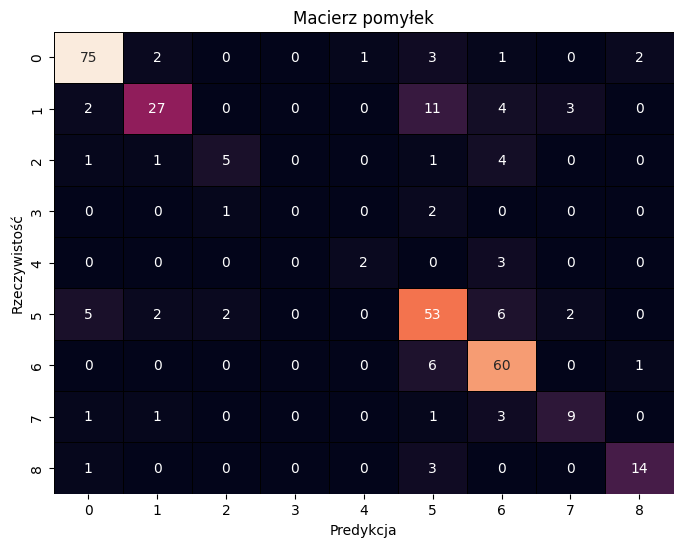

In [587]:
pca = PCA(n_components=12).fit(X2_train_scaled)
X2_train_pca = pca.transform(X2_train_scaled)
X2_test_pca  = pca.transform(X2_test_scaled)
model = ELM(
12,
220,
9
)
model.fit(X2_train_pca, y2_train_onehot)
test_pred = model.pred(X2_test_pca)
model.cm(test_pred, y2_test)

We receive a slightly improved model that accurately generalizes in over 81% of cases. This gives us a 6 percentage point improvement, which is definitely a good result. It's not the same as with SVM, but here we had much less to do in terms of parameter tuning, and the training time was also significantly shorter. Now let's move on to logistic regression and see how it performs. First, we'll try it with default settings, and then we'll explore some options for the regularization parameter.

In [588]:
LogisticRegression().fit(X2_train_scaled,y2_train).score(X2_test_scaled,y2_test)

0.7320872274143302

In [589]:
pipeline = make_pipeline(
    StandardScaler(),
    PCA(),
    LogisticRegression()
)

param_grid =[
    {
        'pca__n_components': [10, 11, 12, 13, 14],
        'logisticregression__C': [0.01, 0.1, 1, 10, 100, 1000, 5000, 10000, 50000],
        'logisticregression__max_iter': [1000] 
    }
]

gridsearch1 = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=10).fit(X2_train,y2_train)

c:\Users\pawel.drzyzga\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(


In [590]:
gridsearch1.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=14)),
                ('logisticregression',
                 LogisticRegression(C=5000, max_iter=1000))])

In [591]:
gridsearch1.score(X2_test, y2_test)

0.8068535825545171

<Axes: >

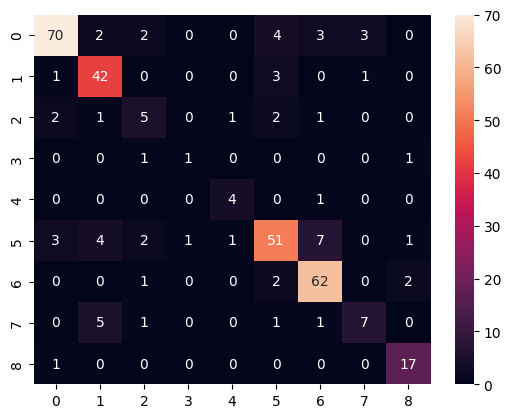

In [592]:
sns.heatmap(confusion_matrix(y2_test, gridsearch1.predict(X2_test)), annot=True)

Initially, we get a model that predicts with an accuracy of 73%, which is the worst result we've obtained so far. However, using GridSearchCV, we attempt to find the best parameter tuning, and eventually, our accuracy increases to 80%. A 7 percentage point increase is quite substantial for such a result. It's nearly the same as with the Extreme Learning Machine, but I believe there's definitely more potential for improvement with ELM. Let's now move directly to SVM. We won't create a model with default parameters; instead, we'll start with grid search right away, then analyze it, and step by step try to find the best model.

In [593]:
pipeline1 = make_pipeline(
    StandardScaler(),
    PCA(),
    SVC(probability=True)
)

param_grid =[
    {
        'pca__n_components': [10,11,12,14],
        "svc__kernel": ['rbf'], 
        'svc__C': [0.001, 0.01, 0.1, 1, 10, 50, 100,500,1000], 
        'svc__gamma': [0.0001,0.001, 0.01, 0.1, 1, 10, 50, 100]
    },
]
gridsearch1 = GridSearchCV(estimator=pipeline1, param_grid=param_grid, cv=10).fit(X2_train,y2_train)
gridsearch1.best_estimator_


c:\Users\pawel.drzyzga\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=14)),
                ('svc', SVC(C=500, gamma=0.01))])

In [594]:
gridsearch1.best_score_

0.8791666666666667

In [595]:
gridsearch1.score(X2_test,y2_test)

0.8878504672897196

In [596]:
results = pd.DataFrame(gridsearch1.cv_results_)
filtered_results = results.loc[results['param_pca__n_components'] == 14]
filtered_results = filtered_results[['param_svc__C', 'param_svc__gamma', 'mean_test_score']]

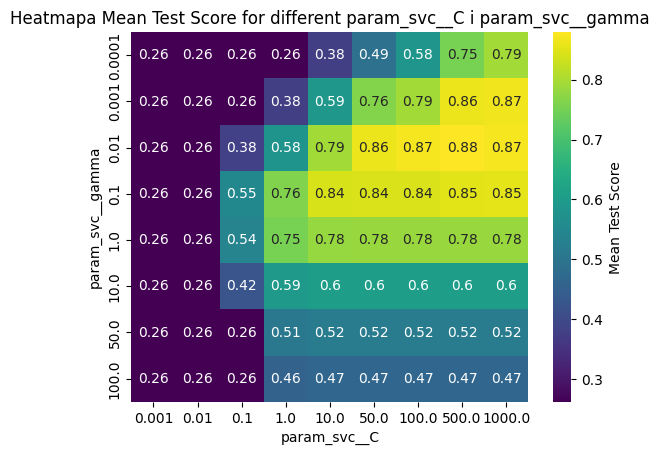

In [597]:
pivot_table = filtered_results.pivot(index="param_svc__gamma", columns="param_svc__C", values="mean_test_score")

sns.heatmap(pivot_table, annot=True, cmap="viridis", cbar_kws={'label': 'Mean Test Score'})
plt.title('Heatmapa Mean Test Score for different param_svc__C i param_svc__gamma')
plt.xlabel('param_svc__C')
plt.ylabel('param_svc__gamma')
plt.show()

<Axes: >

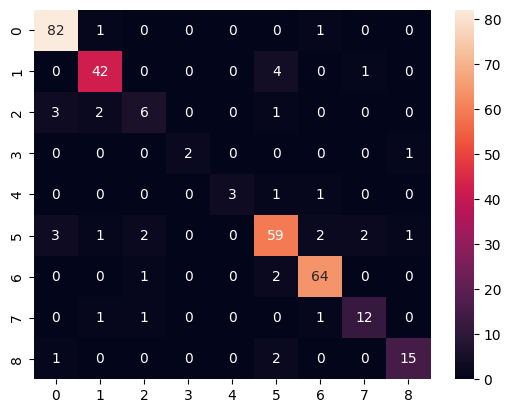

In [598]:
sns.heatmap(confusion_matrix(y2_test, gridsearch1.predict(X2_test)), annot=True)

At the very beginning, we already receive a quite strong model, definitely the best among those we've created. However, we notice that the accuracy values start to increase as we move towards the northeast direction. Let's try to steer in that direction and find an even better model.

In [599]:
pipeline1 = make_pipeline(
    StandardScaler(),
    PCA(),
    SVC(probability=True)
)

param_grid =[
    {
        'pca__n_components': [14],
        "svc__kernel": ['rbf'], 
        'svc__C': np.linspace(10,5000,15), 
        'svc__gamma': np.linspace(.0001,.1,15)
    },
]
gridsearch1 = GridSearchCV(estimator=pipeline1, param_grid=param_grid, cv=10).fit(X2_train,y2_train)
gridsearch1.best_estimator_


c:\Users\pawel.drzyzga\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=14)),
                ('svc', SVC(C=3930.714285714286, gamma=0.007235714285714286))])

In [600]:
gridsearch1.score(X2_test,y2_test)

0.9003115264797508

In [601]:
results = pd.DataFrame(gridsearch1.cv_results_)
filtered_results = results.loc[results['param_pca__n_components'] == 14]
filtered_results = filtered_results[['param_svc__C', 'param_svc__gamma', 'mean_test_score']]

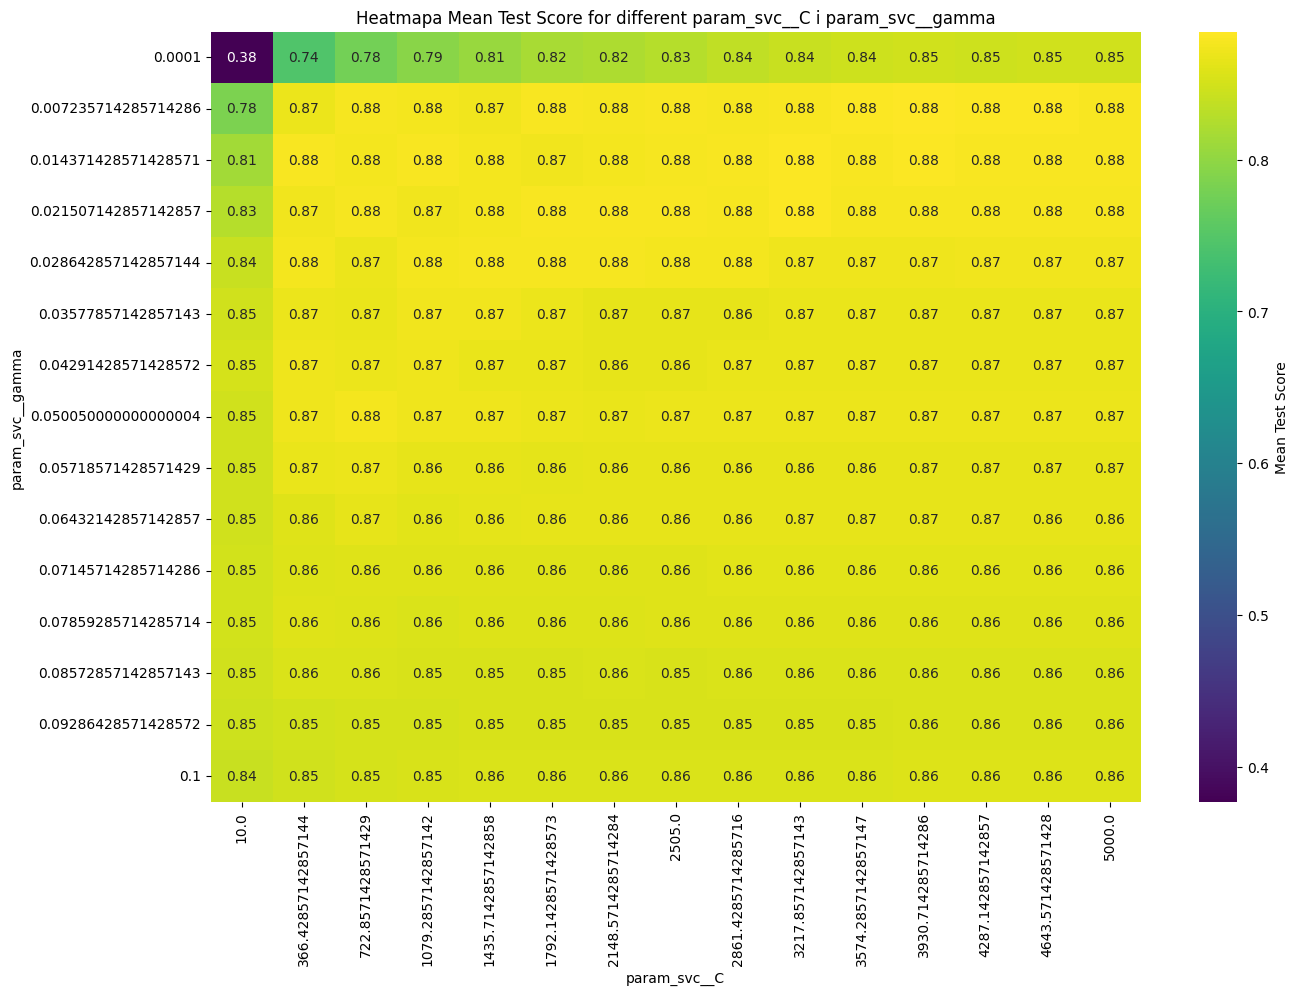

In [602]:
pivot_table = filtered_results.pivot(index="param_svc__gamma", columns="param_svc__C", values="mean_test_score")

plt.figure(figsize=(15,10))
sns.heatmap(pivot_table, annot=True, cmap="viridis", cbar_kws={'label': 'Mean Test Score'})
plt.title('Heatmapa Mean Test Score for different param_svc__C i param_svc__gamma')
plt.xlabel('param_svc__C')
plt.ylabel('param_svc__gamma')
plt.show()

<Axes: >

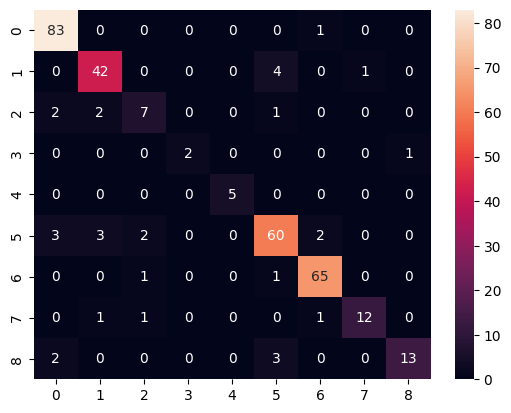

In [603]:
sns.heatmap(confusion_matrix(y2_test, gridsearch1.predict(X2_test)), annot=True)

Our intuition was not wrong; we've already gained a few percentage points on the test set. Just by looking at the heatmap, it's apparent that it might be getting difficult to further improve the model, but let's try expanding the range of parameter search a bit more. Perhaps we'll manage to unearth something.

In [604]:
pipeline1 = make_pipeline(
    StandardScaler(),
    PCA(),
    SVC(probability=True)
)

param_grid =[
    {
        'pca__n_components': [14],
        "svc__kernel": ['rbf'], 
        'svc__C': np.linspace(1500,50000,15), 
        'svc__gamma': np.linspace(.0001,.005,15)
    },
]
gridsearch1 = GridSearchCV(estimator=pipeline1, param_grid=param_grid, cv=10).fit(X2_train,y2_train)
gridsearch1.best_estimator_


c:\Users\pawel.drzyzga\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=14)),
                ('svc', SVC(C=50000.0, gamma=0.00115))])

In [605]:
gridsearch1.score(X2_test,y2_test)

0.9034267912772586

In [606]:
results = pd.DataFrame(gridsearch1.cv_results_)
filtered_results = results.loc[results['param_pca__n_components'] == 14]
filtered_results = filtered_results[['param_svc__C', 'param_svc__gamma', 'mean_test_score']]

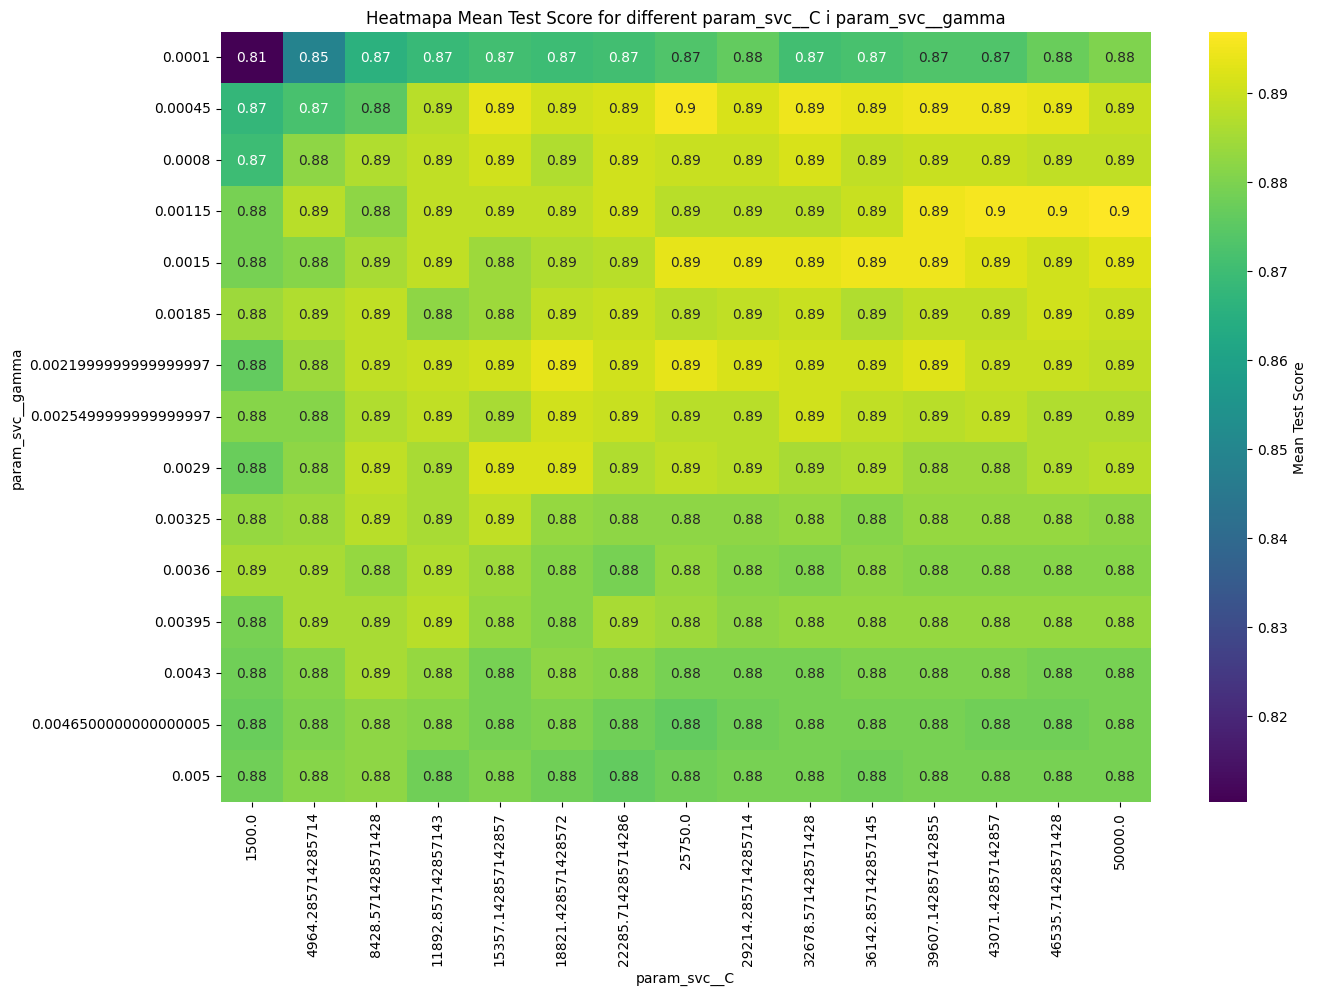

In [607]:
pivot_table = filtered_results.pivot(index="param_svc__gamma", columns="param_svc__C", values="mean_test_score")

plt.figure(figsize=(15,10))
sns.heatmap(pivot_table, annot=True, cmap="viridis", cbar_kws={'label': 'Mean Test Score'})
plt.title('Heatmapa Mean Test Score for different param_svc__C i param_svc__gamma')
plt.xlabel('param_svc__C')
plt.ylabel('param_svc__gamma')
plt.show()

In [608]:
pipeline1 = make_pipeline(
    StandardScaler(),
    PCA(),
    SVC(probability=True)
)

param_grid =[
    {
        'pca__n_components': [14],
        "svc__kernel": ['rbf'], 
        'svc__C': np.linspace(20000,170000,15), 
        'svc__gamma': np.linspace(.0001,.00325,10)
    },
]
gridsearch1 = GridSearchCV(estimator=pipeline1, param_grid=param_grid, cv=10).fit(X2_train,y2_train)
gridsearch1.best_estimator_


c:\Users\pawel.drzyzga\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=14)),
                ('svc', SVC(C=127142.85714285713, gamma=0.0008))])

In [609]:
gridsearch1.score(X2_test,y2_test)

0.9096573208722741

In [610]:
results = pd.DataFrame(gridsearch1.cv_results_)
filtered_results = results.loc[results['param_pca__n_components'] == 14]
filtered_results = filtered_results[['param_svc__C', 'param_svc__gamma', 'mean_test_score']]

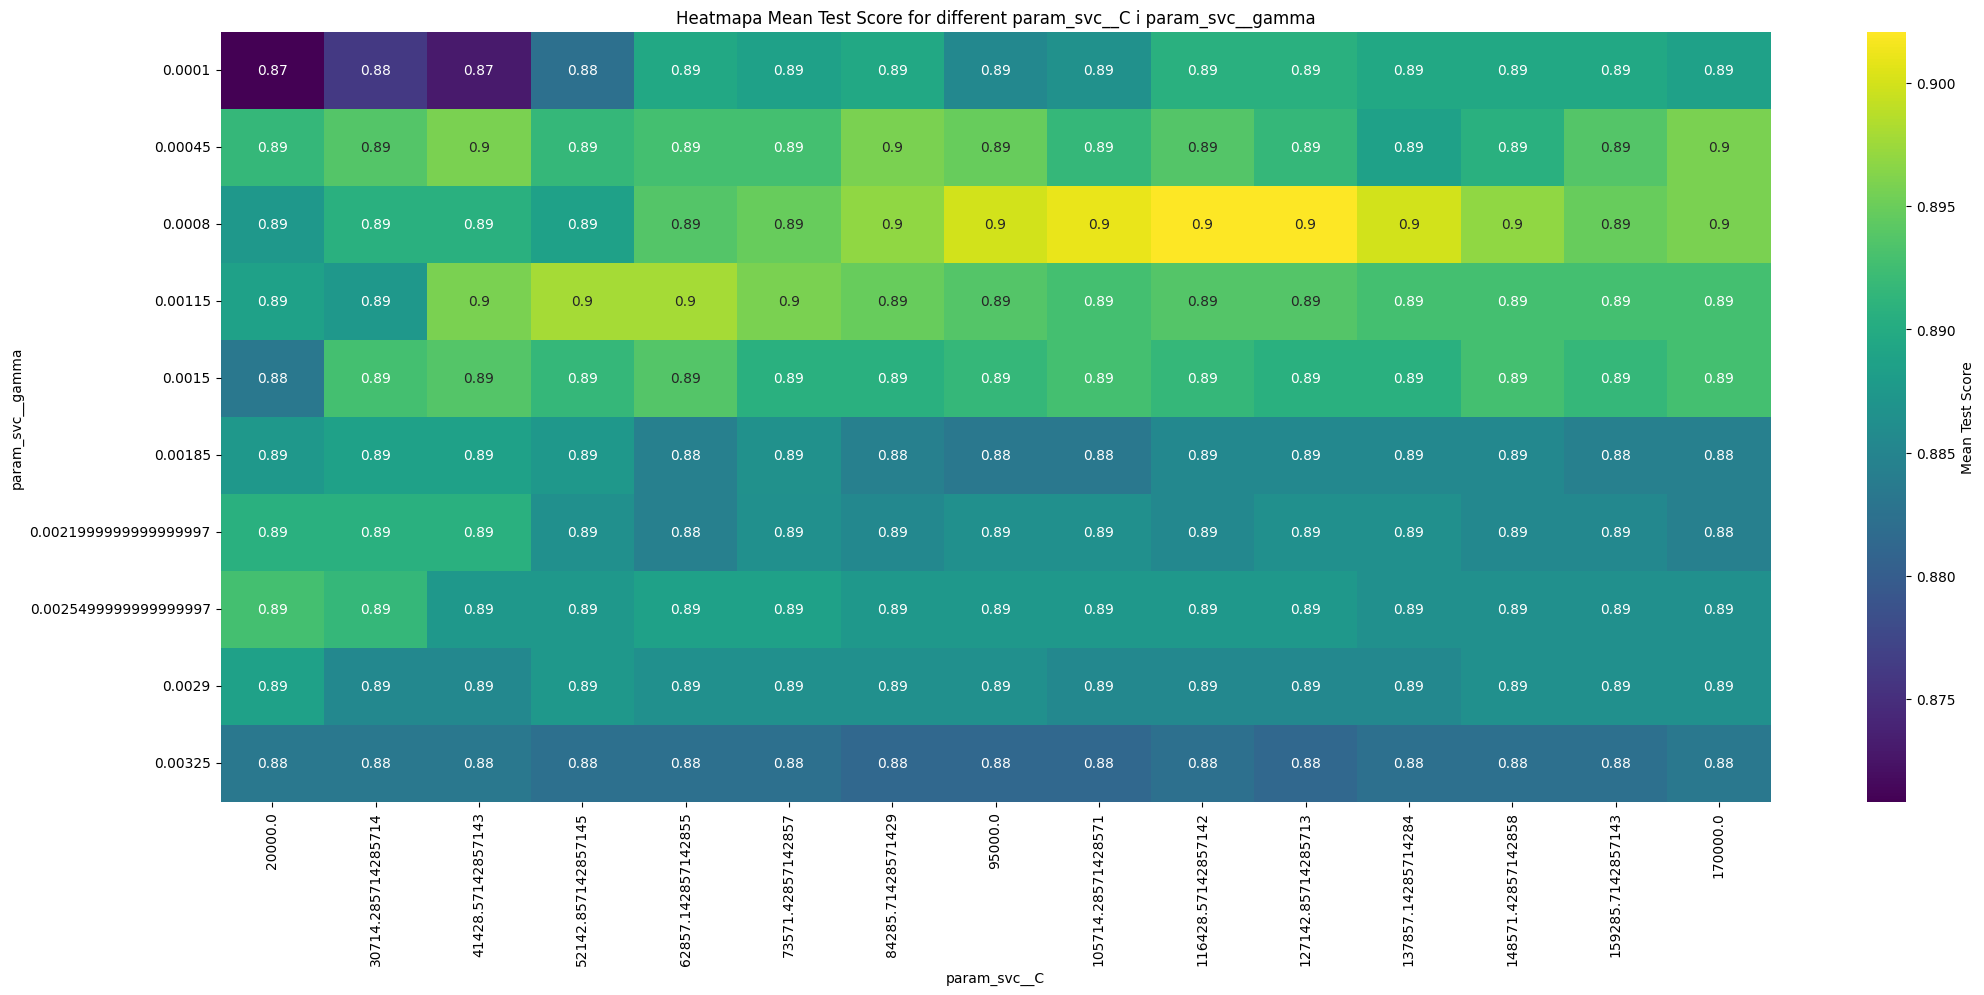

In [611]:
pivot_table = filtered_results.pivot(index="param_svc__gamma", columns="param_svc__C", values="mean_test_score")

plt.figure(figsize=(25,10))
sns.heatmap(pivot_table, annot=True, cmap="viridis", cbar_kws={'label': 'Mean Test Score'})
plt.title('Heatmapa Mean Test Score for different param_svc__C i param_svc__gamma')
plt.xlabel('param_svc__C')
plt.ylabel('param_svc__gamma')
plt.show()

<Axes: >

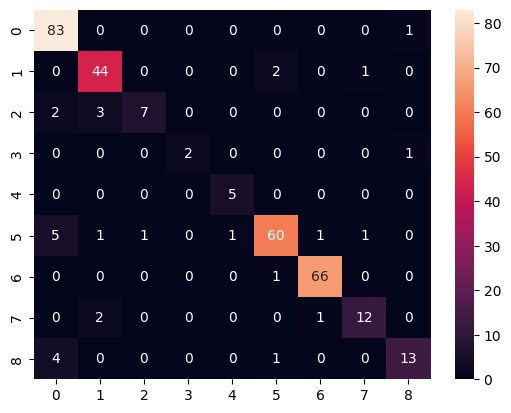

In [612]:
sns.heatmap(confusion_matrix(y2_test, gridsearch1.predict(X2_test)), annot=True)

Finally, we find what is arguably the best model we can currently achieve using SVM, and if not the best, then certainly very satisfactory. An accuracy level of over 90% in multiclass classification is certainly optimistic. The obstacle to achieving a higher score may simply be that some classes are very small in size.

# 4. Concluding Remarks on the Entire Project

#### Project Objective
The aim of the project was to classify medical data related to blood parameters to accurately diagnose patients' health conditions. Various machine learning algorithms were applied to determine which one best predicts outcomes based on input data.

#### Initial Data Analysis
The data included significant features such as platelet count (PLT), hemoglobin concentration (HGB), and other blood parameters. Exploratory data analysis (EDA) revealed that some features have strong correlations with medical diagnoses.

#### Data Transformation
- Outcome variables were binary encoded, facilitating modeling.
- Data standardization and principal component analysis (PCA) were applied to reduce dimensionality and information redundancy.

#### Modeling
- Logistic regression and support vector machine (SVM) with different kernels (RBF and linear) were used for classification, along with a simple neural network from the TensorFlow package, and the Extreme Learning Machine.
- Data were split into training and test sets to assess overall model performance.

#### Results
- **Logistic regression** achieved an accuracy of 87% on the test set, indicating solid, though not ideal, performance.
- **SVM with RBF kernel** achieved the highest accuracy at 95%, suggesting it's the most effective model in this case.
- **Gradient-based neural network** also showed fairly high accuracy, though slightly lower than SVM with RBF kernel.
- **Extreme Learning Machine** was the biggest surprise of the project, with its surprisingly high accuracy given its simplicity.

#### Visualization of Results
- Confusion matrices and PCA plots helped visualize how well models perform in classification and which classes are most frequently misclassified.
- ROC curves and AUC values showed that models distinguish between classes well, with SVM with RBF kernel having the highest AUC value.

#### Key Insights
1. **Model Selection**: SVM with RBF kernel proved to be the best model for classifying medical data, achieving the highest accuracy and best results in other evaluation metrics.
2. **Feature Importance**: Features such as platelet count (PLT) and hemoglobin concentration (HGB) play a crucial role in diagnosing health conditions, as confirmed by high correlation coefficients and importance in models.
3. **Data Transformation**: Data standardization and dimensionality reduction through PCA improved model performance, suggesting these steps are important in processing medical data.
4. **Application of Machine Learning**: Machine learning models, such as SVM, are effective in classifying medical data and can be applied in clinical practice to assist with diagnoses.

In conclusion, the project demonstrated that appropriately chosen and processed machine learning algorithms can significantly improve health condition diagnoses based on medical data.